### Loan Application Status Prediction

**Project Description**

This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc. 

**Independent Variables:**
- Loan_ID - This refer to the unique identifier of the applicant's affirmed purchases
- Gender - This refers to either of the two main categories (male and female) into which applicants are divided on the basis of their reproductive functions
- Married - This refers to applicant being in a state of matrimony
- Dependents - This refres to persons who depends on the applicants for survival
- Education - This refers to number of years in which applicant received systematic instruction, especially at a school or university
- Self_Employed - This refers to applicant working for oneself as a freelancer or the owner of a business rather than for an employer
- Applicant Income - This refers to disposable income available for the applicant's use under State law.
- CoapplicantIncome - This refers to disposable income available for the people that participate in the loan application process alongside the main applicant use under State law.
- Loan_Amount - This refers to the amount of money an applicant owe at any given time.
- Loan_Amount_Term - This refers to the duaration in which the loan is availed to the applicant
- Credit History - This refers to a record of applicant's ability to repay debts and demonstrated responsibility in repaying them.
- Property_Area - This refers to the total area within the boundaries of the property as set out in Schedule.
- Loan_Status - This refres to whether applicant is eligible to be availed the Loan requested.

You have to build a model that can predict whether the loan of the applicant will be approved(Loan_status) or not on the basis of the details provided in the dataset. 


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('loan_prediction.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


- Datset has both numerical and categorical data

In [3]:
df.shape

(614, 13)

- The datset has 614 rows and 13 columns

In [4]:
df.columns.to_list()

['Loan_ID',
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History',
 'Property_Area',
 'Loan_Status']

- The list of variables in the dataset

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


- The dtypes: float64(4), int64(1), object(8) and memory usage: 62.5+ KB


In [6]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

- The dtypes: float64(4), int64(1), object(8)

In [7]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

- We have null values in the dataset

In [8]:
df.duplicated().sum()

0

- There are no duplicated values in the dataset

In [9]:
df.interpolate(method='linear', inplace=True)

- Missing values were imputed using linear interpolation, ensuring a continuous and smooth adjustment of values across the dataset.

In [10]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            1
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

- the categorical variables still have null values

In [11]:
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
df['Married'].fillna(df['Married'].mode()[0], inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace=True)

- Used mode imputation to replace missing values.

In [12]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           1
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

- only 1 null value is in LoanAmount variable 

In [13]:
df=df.dropna()

- we dropped the entire row that contains null value

In [14]:
df.shape

(613, 13)

- The new shape is rows: 613 and columns 13

In [15]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

- The data has no more null values

In [16]:
blank_spaces = [column for column in df.columns if df[column].dtype == 'object' and df[column].str.strip().str.len().any()]

if blank_spaces:
    print("Columns with leading or trailing spaces:")
    print(blank_spaces)
else:
    print(" No columns have leading or trailing spaces:")
    
for column in blank_spaces:
    df[column] = df[column].str.strip() 
    
has_spaces_after_cleaning = df.applymap(lambda x: isinstance(x, str) and x.strip() != x).any().any()

if has_spaces_after_cleaning:
    print("DataFrame still has leading or trailing spaces.")
else:
    print("Data does not have leading or trailing spaces after cleaning.")

Columns with leading or trailing spaces:
['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']
Data does not have leading or trailing spaces after cleaning.


In [17]:
for i in df.columns:
    print(df[i].value_counts())
    print('\n')

Loan_ID
LP001003    1
LP002332    1
LP002308    1
LP002314    1
LP002315    1
           ..
LP001693    1
LP001698    1
LP001699    1
LP001702    1
LP002990    1
Name: count, Length: 613, dtype: int64


Gender
Male      501
Female    112
Name: count, dtype: int64


Married
Yes    401
No     212
Name: count, dtype: int64


Dependents
0     359
1     102
2     101
3+     51
Name: count, dtype: int64


Education
Graduate        479
Not Graduate    134
Name: count, dtype: int64


Self_Employed
No     531
Yes     82
Name: count, dtype: int64


ApplicantIncome
2500    9
4583    6
2600    6
6000    6
5000    5
       ..
3244    1
4408    1
3917    1
3992    1
7583    1
Name: count, Length: 504, dtype: int64


CoapplicantIncome
0.0       272
2500.0      5
2083.0      5
1666.0      5
1459.0      3
         ... 
2791.0      1
1010.0      1
1695.0      1
2598.0      1
240.0       1
Name: count, Length: 287, dtype: int64


LoanAmount
120.0    21
110.0    17
100.0    15
128.0    12
187.0    12
    

- Iterates through each column in the DataFrame, printing the count of unique values for analysis. - -- Provides a quick overview of the distribution of values in each column.

In [18]:
df.nunique().to_frame('No: of unique values')

,No: of unique values
Loan_ID,613
Gender,2
Married,2
Dependents,4
Education,2
Self_Employed,2
ApplicantIncome,504
CoapplicantIncome,287
LoanAmount,211
Loan_Amount_Term,13


- Displays the count of unique values for each column in the DataFrame

In [19]:
numerical_columns=[i for i in df.columns if df[i].nunique()>5]
categorical_columns=[i for i in df.columns if df[i].nunique()<=5]

- Identifies numerical and categorical columns based on the number of unique values.
- Numerical columns have more than 5 unique values, while categorical columns have 5 or fewer unique values. 

In [20]:
numerical_columns

['Loan_ID',
 'ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term']

In [21]:
categorical_columns

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Credit_History',
 'Property_Area',
 'Loan_Status']

In [22]:
df.shape

(613, 13)

- The new shape is rows: 613 and columns 13

In [23]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,613.000000,613.000000,613.000000,613.000000,613.000000
mean,5402.732463,1623.890571,146.914356,341.990212,0.838499
std,6114.004114,2927.903583,85.626462,64.733389,0.360571
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2876.000000,0.000000,100.000000,360.000000,1.000000
50%,3812.000000,1210.000000,128.000000,360.000000,1.000000
75%,5780.000000,2302.000000,167.000000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


- ApplicantIncome: Ranges from 150 to 81,000, with a mean of 5,402.73 and a notable standard deviation of 6,114. Mean and median values suggest potential right skewness.

- CoapplicantIncome: Displays a wide range, with a mean of 1,623.89. The majority have zero coapplicant income, indicated by the 25th percentile at 0 and a large standard deviation of 2,927.90.

- LoanAmount: Varies from 9 to 700, with a mean of 146.91 and a moderate standard deviation of 85.63. Potential outliers might exist due to the considerable gap between the 75th percentile and the maximum.

- Loan_Amount_Term: Primarily set at 360 months (75th percentile), with a mean of 341.99. Some diversity is observed, potentially indicating varying loan terms.

- Credit_History: Binary variable (0 or 1) indicating credit history. The majority (75th percentile) have a credit history of 1, suggesting good credit.

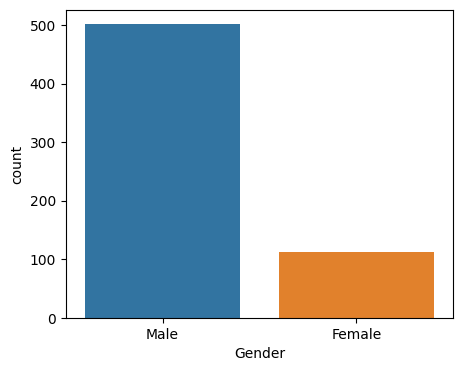

Gender
Male      501
Female    112
Name: count, dtype: int64

In [24]:
plt.figure(figsize=(5,4))
sns.countplot(x='Gender', data=df)
plt.show()

df['Gender'].value_counts()

- a count of gender distribution in the dataset, indicating 501 males and 112 females. 

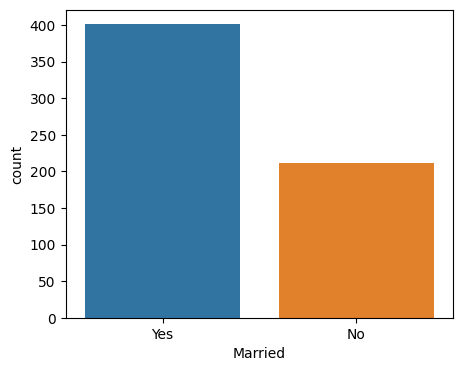

Married
Yes    401
No     212
Name: count, dtype: int64

In [25]:
plt.figure(figsize=(5,4))
sns.countplot(x='Married', data=df)
plt.show()

df['Married'].value_counts()

- Presents the count of marital status, revealing 401 individuals marked as Married and 212 as Not Married. 

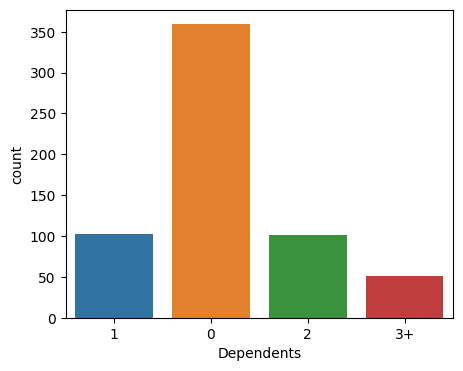

Dependents
0     359
1     102
2     101
3+     51
Name: count, dtype: int64

In [26]:
plt.figure(figsize=(5,4))
sns.countplot(x='Dependents', data=df)
plt.show()

df['Dependents'].value_counts()

- Displays the count of individuals based on the number of dependents: 359 with 0 dependents, 102 with 1 dependent, 101 with 2 dependents, and 51 with 3 or more dependents. 

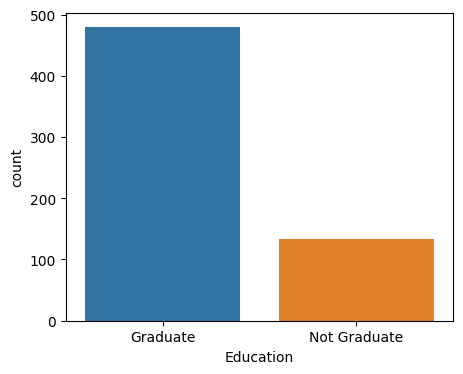

Education
Graduate        479
Not Graduate    134
Name: count, dtype: int64

In [27]:
plt.figure(figsize=(5,4))
sns.countplot(x='Education', data=df)
plt.show()

df['Education'].value_counts()

- Shows the count of individuals based on their education level: 479 are graduates, and 134 are not graduates.

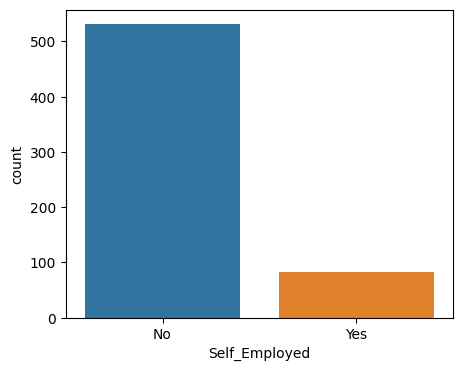

Self_Employed
No     531
Yes     82
Name: count, dtype: int64

In [28]:
plt.figure(figsize=(5,4))
sns.countplot(x='Self_Employed', data=df)
plt.show()

df['Self_Employed'].value_counts()

- Indicates the count of individuals' self-employment status: 531 are not self-employed, and 82 are self-employed. 

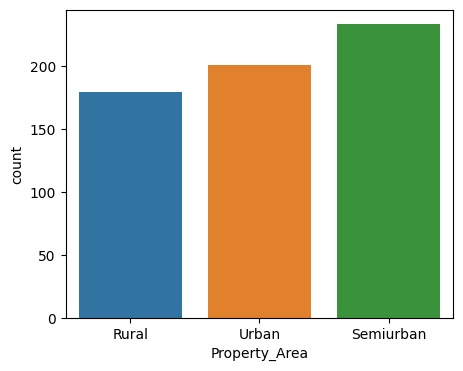

Property_Area
Semiurban    233
Urban        201
Rural        179
Name: count, dtype: int64

In [29]:
plt.figure(figsize=(5,4))
sns.countplot(x='Property_Area', data=df)
plt.show()

df['Property_Area'].value_counts()

- The count of individuals based on their property area: 233 in semiurban, 201 in urban, and 179 in rural areas. 

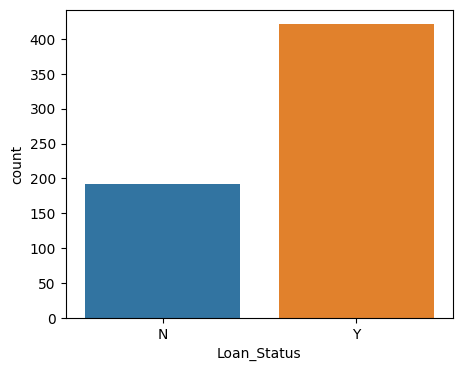

Loan_Status
Y    421
N    192
Name: count, dtype: int64

In [30]:
plt.figure(figsize=(5,4))
sns.countplot(x='Loan_Status', data=df)
plt.show()

df['Loan_Status'].value_counts()

- States the count of individuals based on their loan status: 421 approved (Y) and 192 not approved (N). 

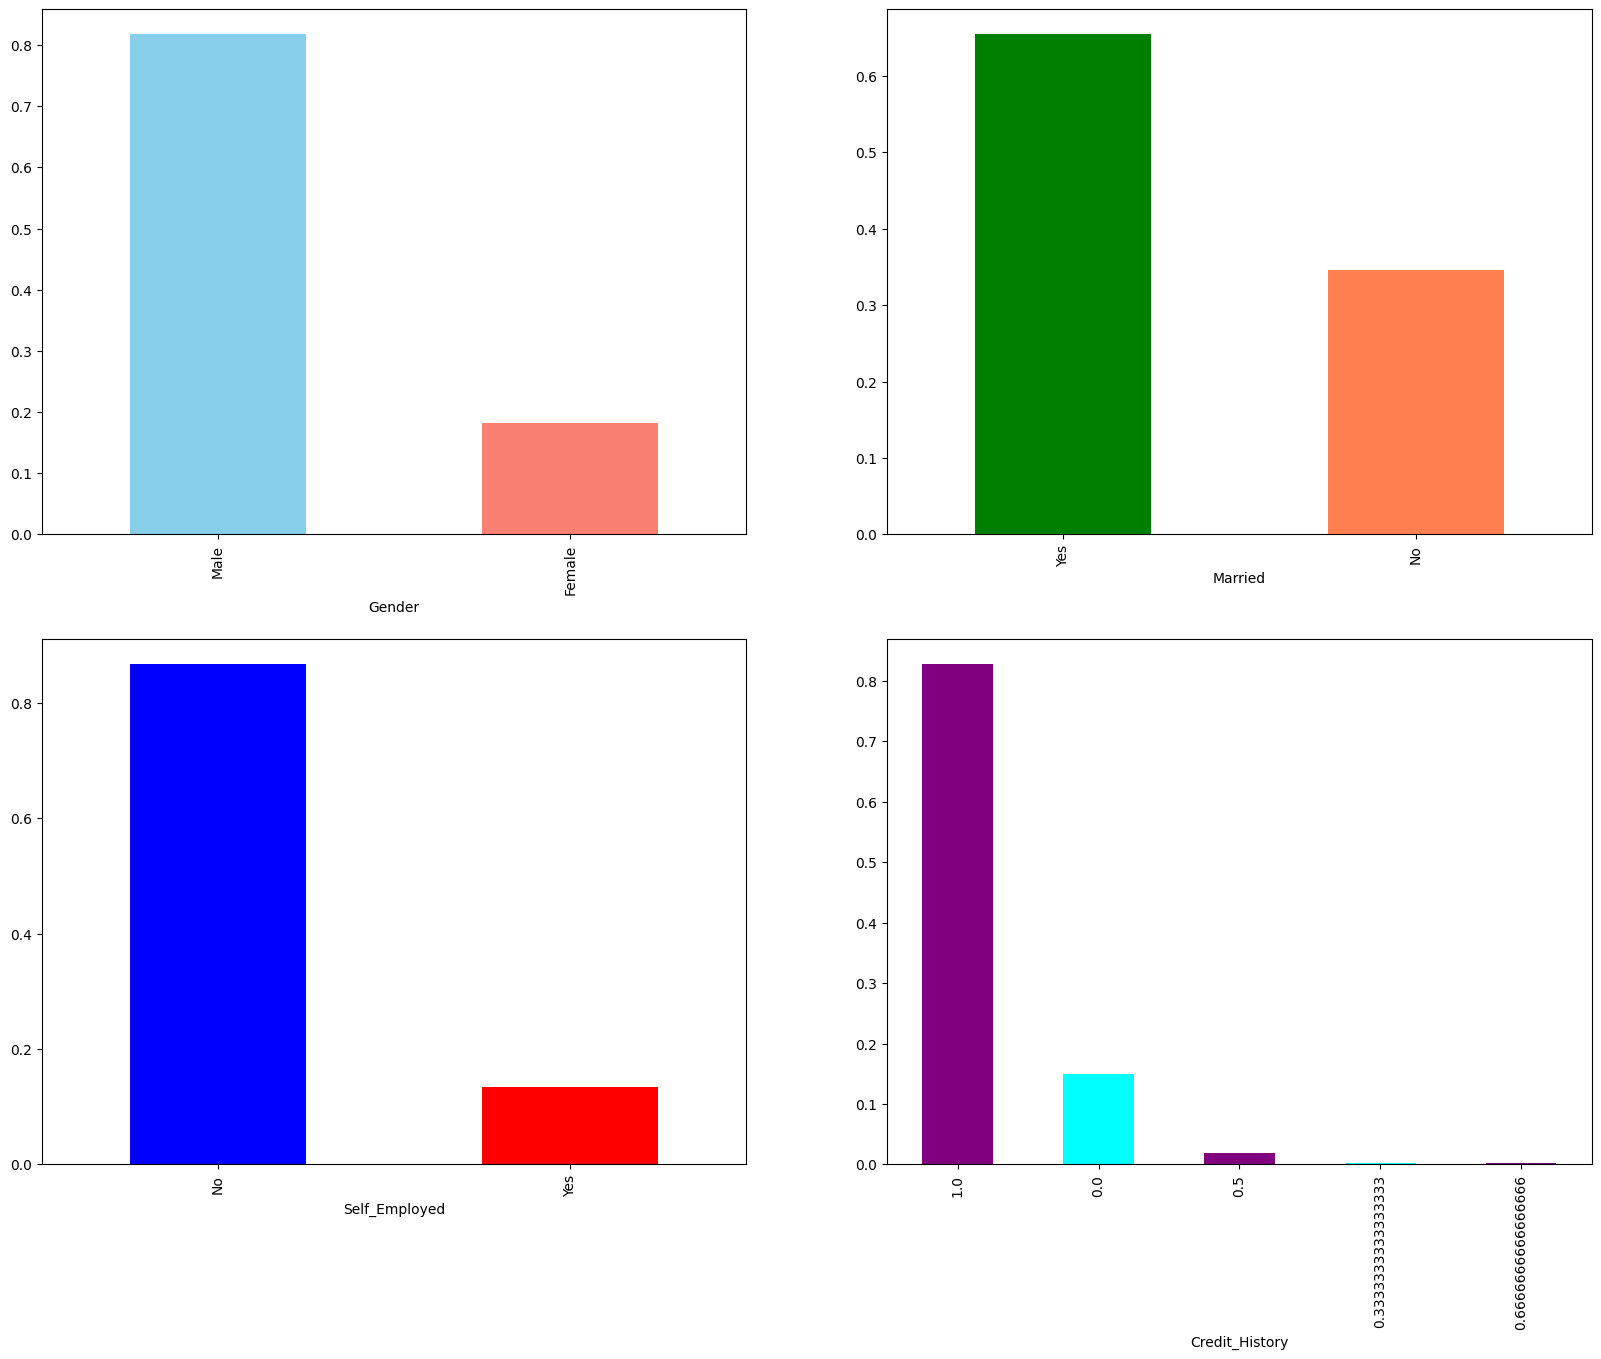

In [31]:
plt.figure(1, figsize=(20, 15))

plt.subplot(221)
df['Gender'].value_counts(normalize=True).plot.bar(color=['skyblue', 'salmon'])

plt.subplot(222)
df['Married'].value_counts(normalize=True).plot.bar(color=['green', 'coral'])

plt.subplot(223)
df['Self_Employed'].value_counts(normalize=True).plot.bar(color=['blue', 'red'])

plt.subplot(224)
df['Credit_History'].value_counts(normalize=True).plot.bar(color=['purple', 'cyan'])

plt.show()


subplots to visually represent the distribution of categorical variables:
- Gender: Approximately 80% male and 20% female.
- Marital Status: Around 65% married and 35% not married.
- Self-Employment: The majority (around 85%) are not self-employed.
- Credit History: Predominantly good credit history, with around 85% having a credit history of 1.

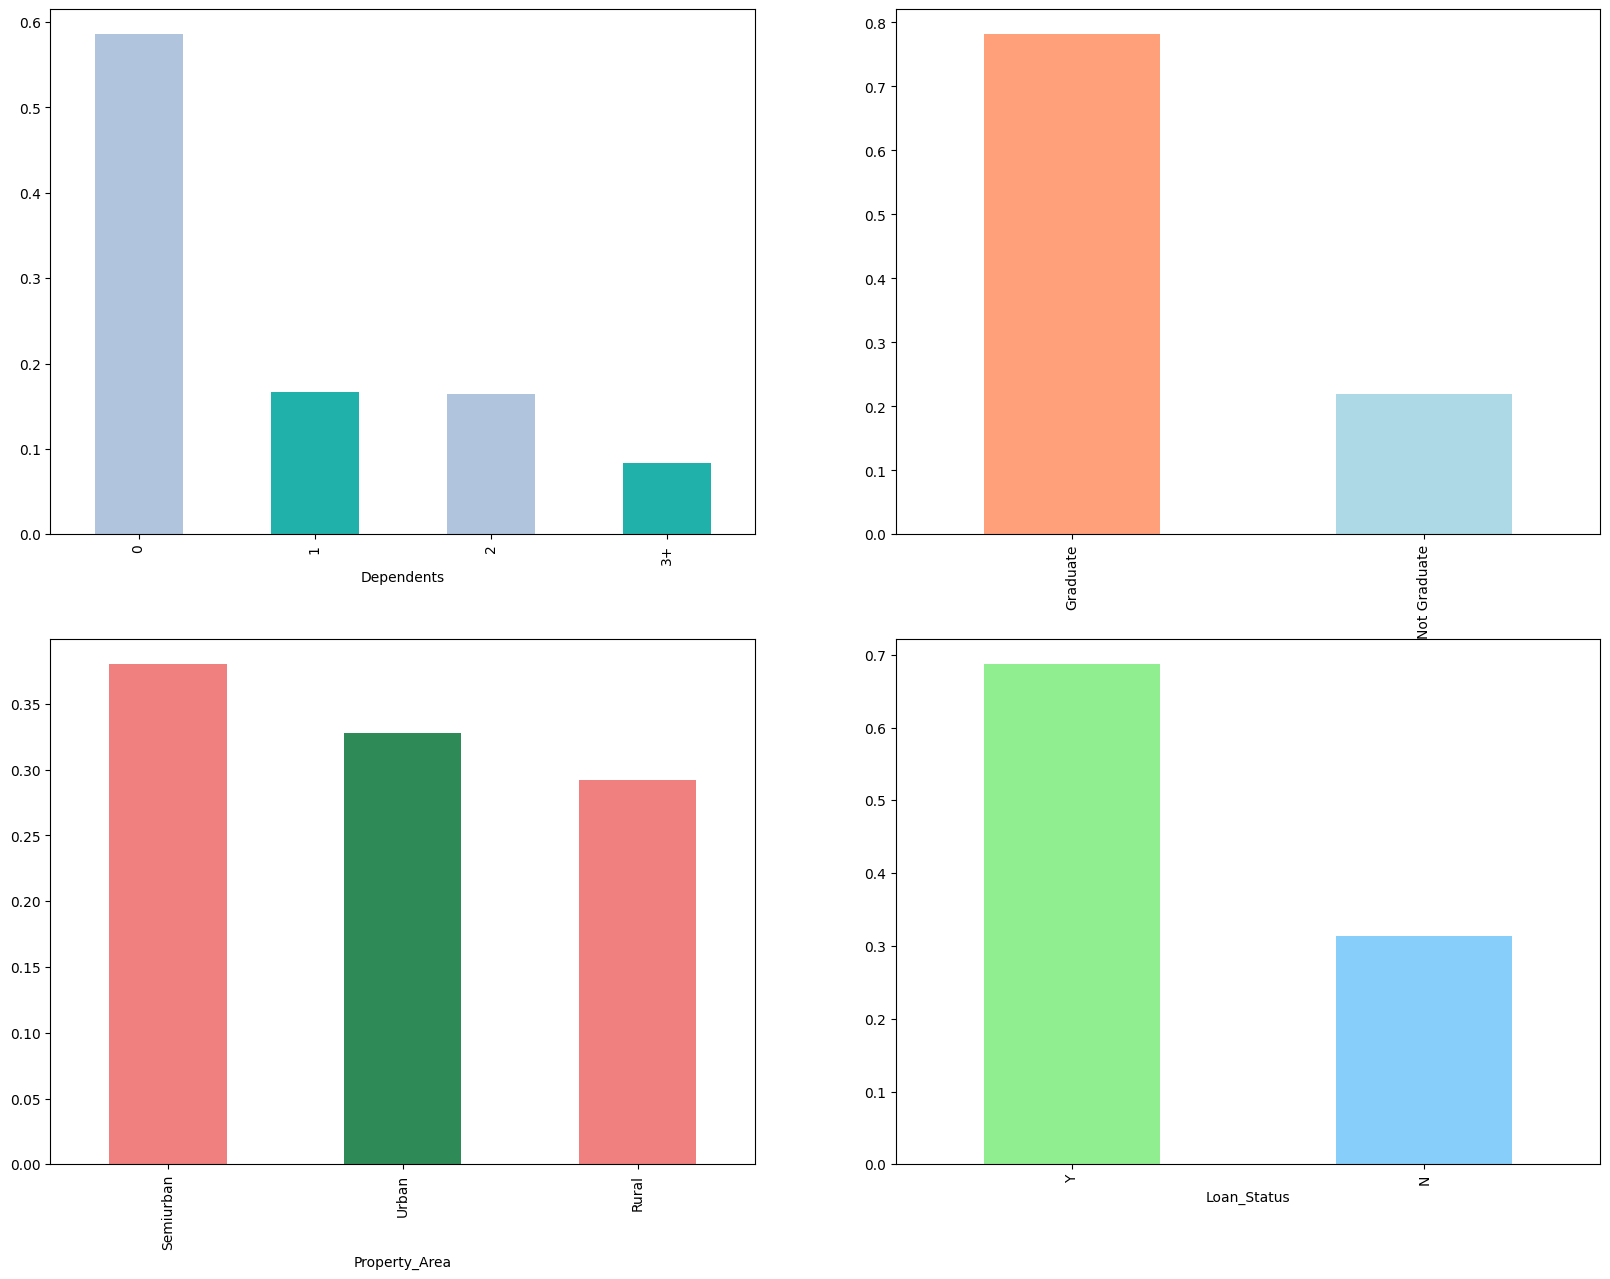

In [32]:
plt.figure(2, figsize=(20, 15))

plt.subplot(221)
df['Dependents'].value_counts(normalize=True).plot.bar(color=['lightsteelblue', 'lightseagreen'])

plt.subplot(222)
df['Education'].value_counts(normalize=True).plot.bar(color=['lightsalmon', 'lightblue'])

plt.subplot(223)
df['Property_Area'].value_counts(normalize=True).plot.bar(color=['lightcoral', 'seagreen'])

plt.subplot(224)
df['Loan_Status'].value_counts(normalize=True).plot.bar(color=['lightgreen', 'lightskyblue'])

plt.show()


Uses subplots to visually display the distribution of additional categorical variables:

- Dependents: Most individuals have 0 dependents, followed by 1, 2, and 3 or more.
- Education: The majority are graduates, constituting around 80%.
- Property Area: Semiurban areas have the highest representation, followed by urban and rural.
- Loan Status: Approximately 70% approved (Y) and 30% not approved (N).

<Figure size 1500x500 with 0 Axes>

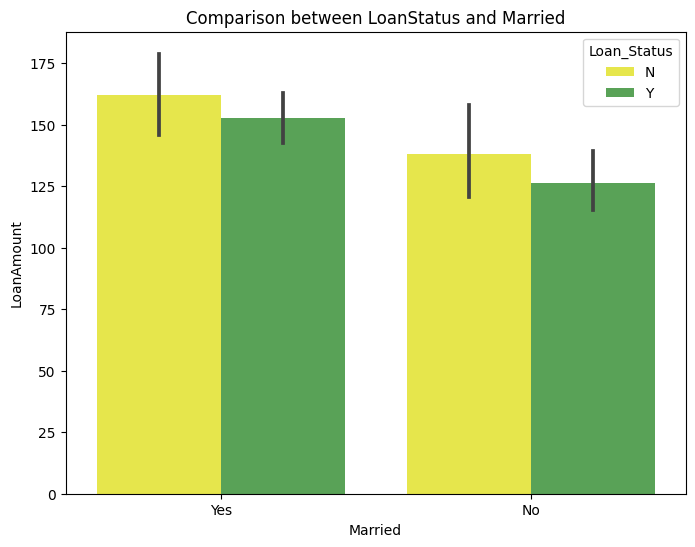

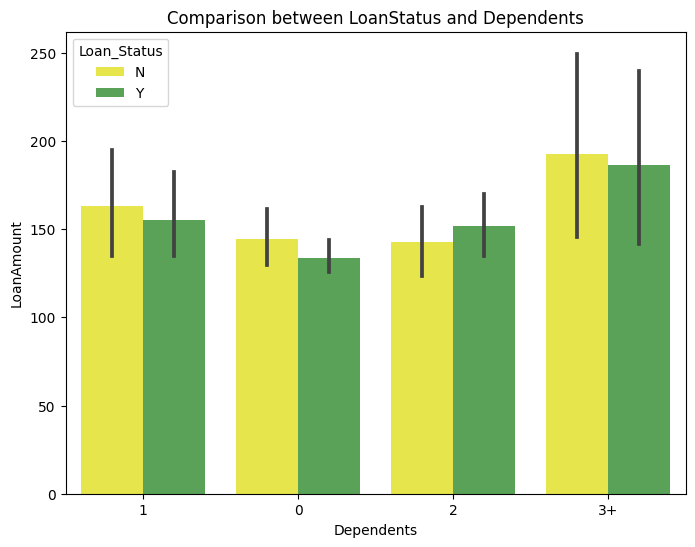

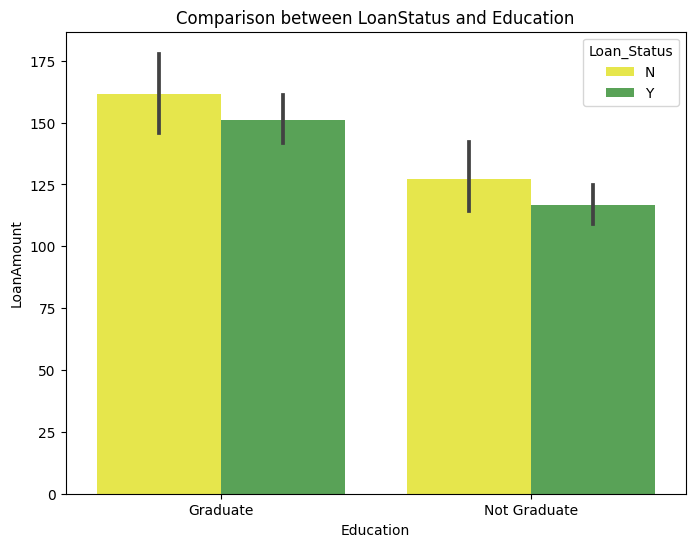

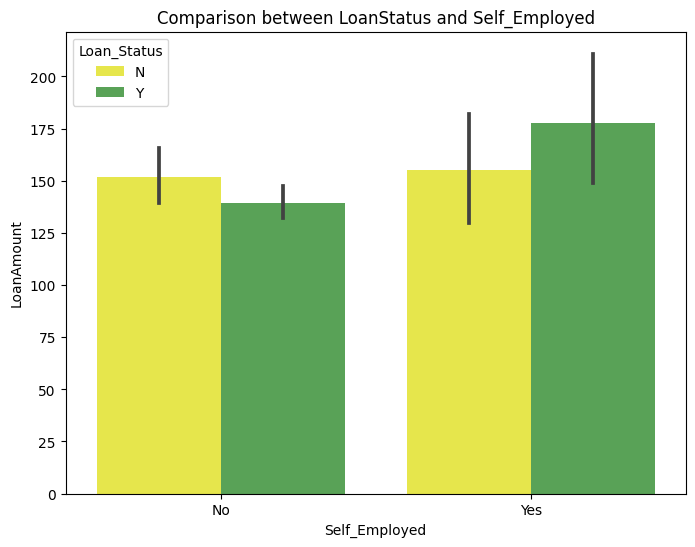

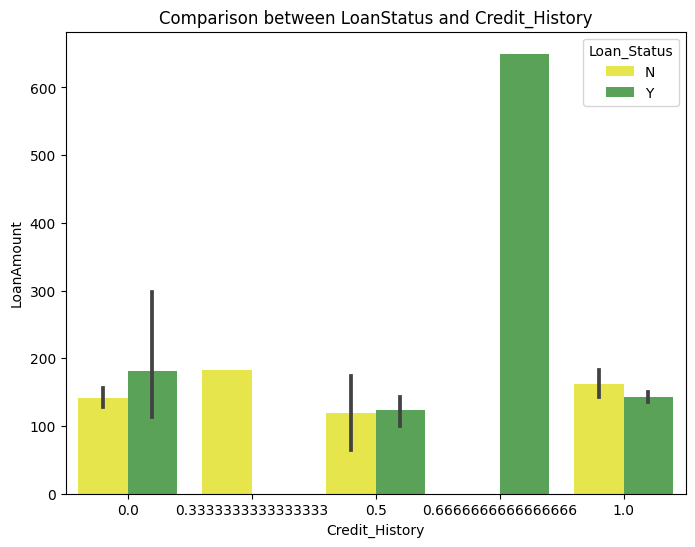

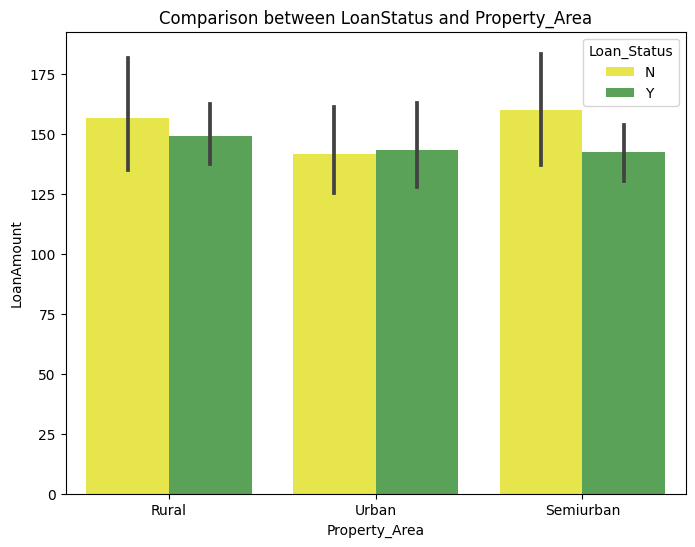

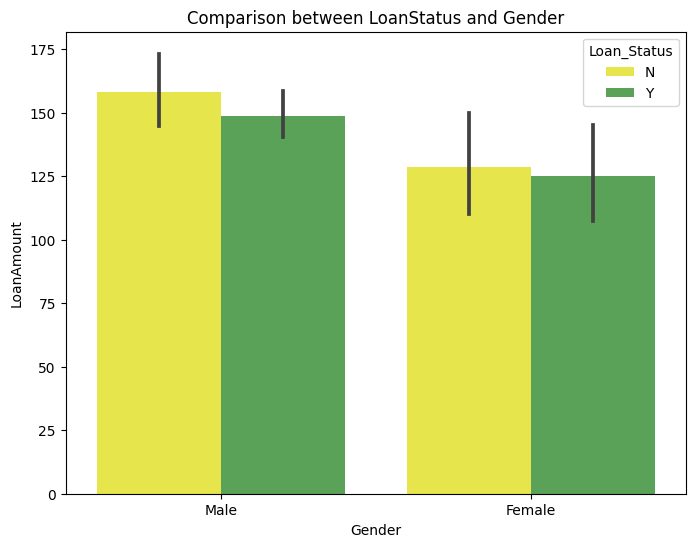

In [33]:
plt.figure(figsize=(15,5))

for column in ['Married', 'Dependents', 'Education', 'Self_Employed', 'Credit_History', 'Property_Area','Gender']:
    plt.figure(figsize=(8, 6))
    sns.barplot(x=column, y='LoanAmount', data=df, hue='Loan_Status', palette='Set1_r', dodge=True)
    plt.title(f'Comparison between LoanStatus and {column}')
    plt.xlabel(column)
    plt.ylabel('LoanAmount')
    plt.show()


Bar plots comparing various features against **'LoanAmount' across 'Loan_Status':**

- Male applicants generally sought larger loans, regardless of the loan status.
- Marital status showed minimal difference in average loan amount approval.
- Individuals with 1 or 2 dependents secured larger approved loans on average compared to those with no dependents or 3+. For unapproved loans, average amounts were similar across groups.
- Graduates tended to secure larger approved loans on average compared to non-graduates. Minimal differences were observed in loan amounts for unapproved loans based on education.
- Self-employed and non-self-employed individuals had similar average approved loans. However, for unapproved loans, self-employed applicants sought larger amounts on average.
- Applicants with bad credit history (0) sought higher unapproved loan amounts on average compared to those with good credit history (1).
- Semiurban residents generally pursued higher loan amounts, regardless of approval status, compared to urban and rural residents.
In summary, higher loan amounts are associated with being male, having 1-2 dependents, being a graduate, and residing in semiurban areas for approved loans. Credit history and property area also influence unapproved loan amounts.

<Figure size 1500x500 with 0 Axes>

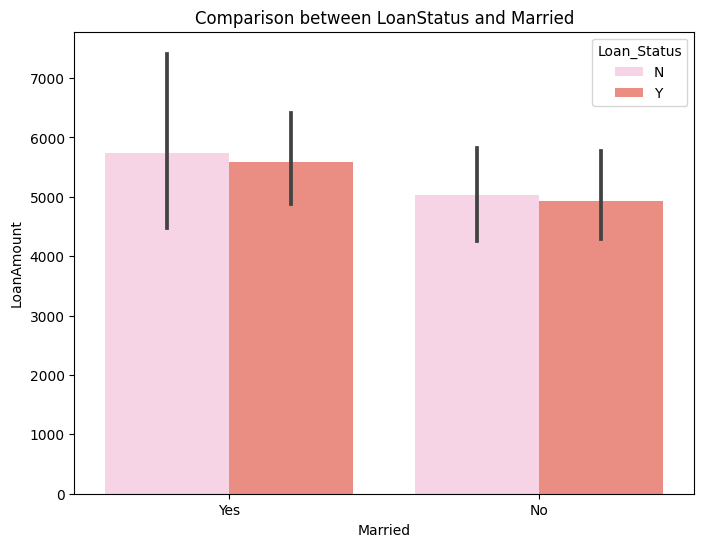

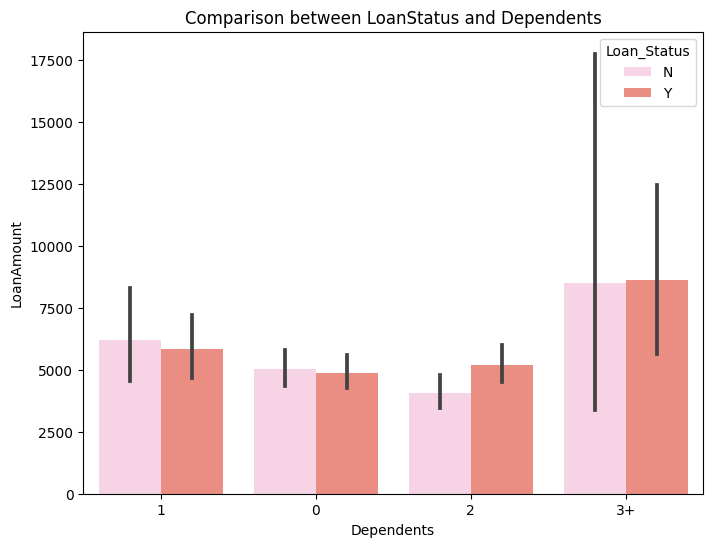

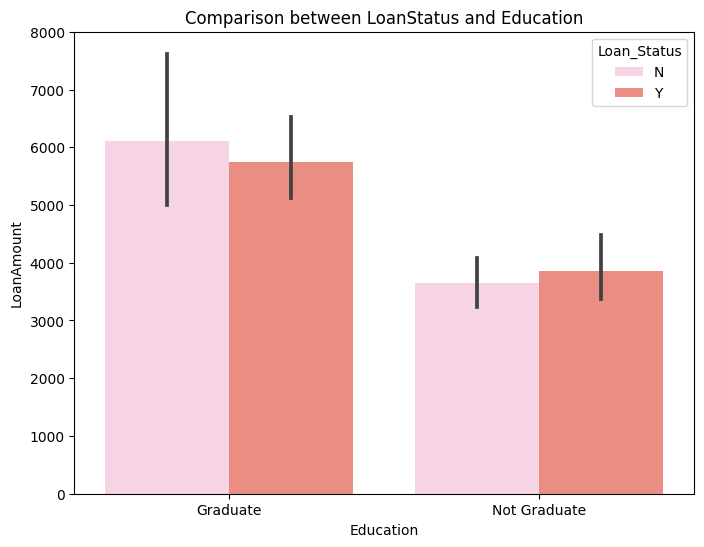

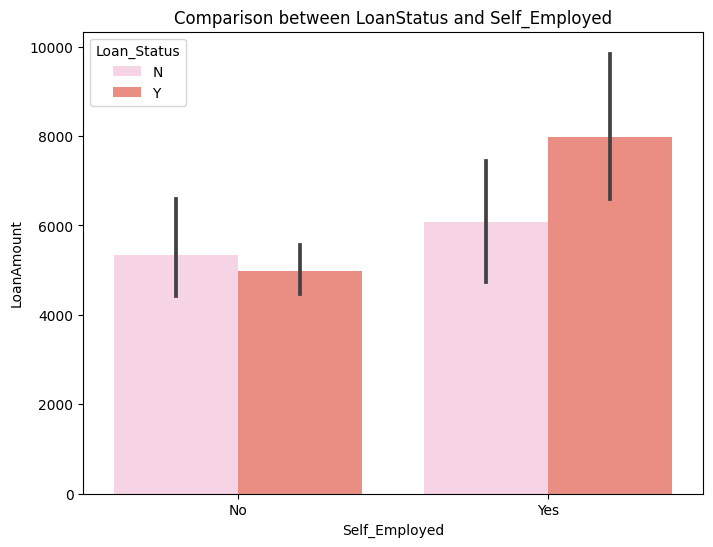

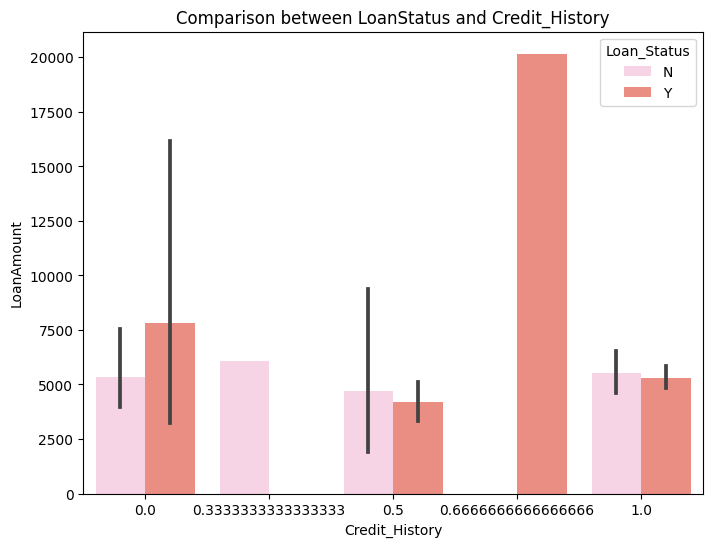

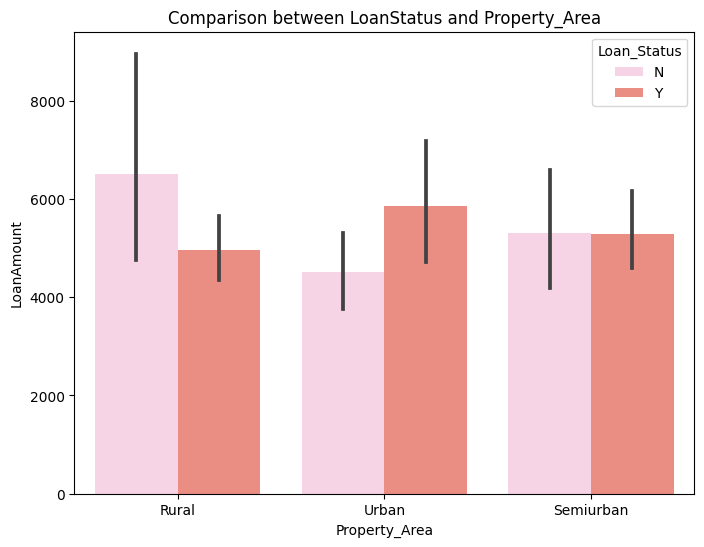

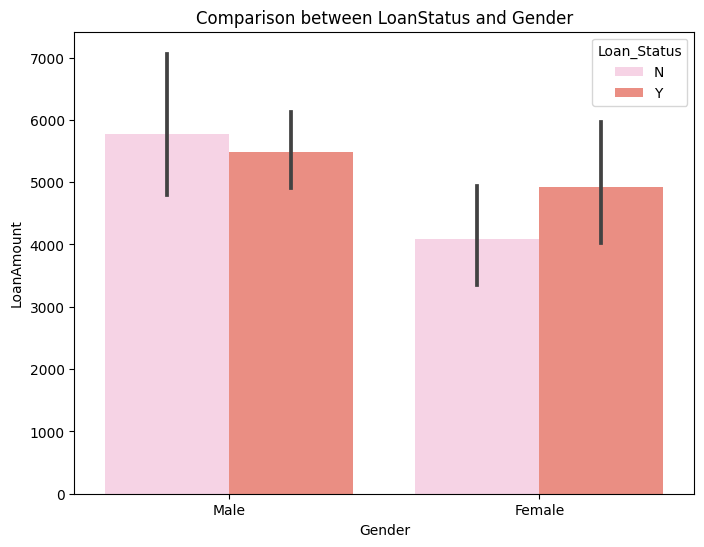

In [34]:
plt.figure(figsize=(15, 5))

for column in ['Married', 'Dependents', 'Education', 'Self_Employed', 'Credit_History', 'Property_Area','Gender']:
    plt.figure(figsize=(8, 6))
    sns.barplot(x=column, y='ApplicantIncome', data=df, hue='Loan_Status', palette='Set3_r', dodge=True)
    plt.title(f'Comparison between LoanStatus and {column}')
    plt.xlabel(column)
    plt.ylabel('LoanAmount')
    plt.show()


- Gender: Both approved and not approved loans show that, on average, males earn more than females. Across loan statuses, males consistently have significantly higher incomes than females.

- Marital Status: Married applicants tend to earn more on average than unmarried applicants, with a more significant gap for approved loans. For approved loans, married applicants earn more than unmarried ones. For not approved loans, incomes are comparable.

- Dependents: Incomes increase from 0 to 2 dependents for both approved and not approved loans. Those with 3 or more dependents have lower average incomes than those with 1-2 dependents. Having dependents is linked to higher income, up to a certain point.

- Education: Graduates generally have higher average incomes compared to non-graduates. The income gap between graduates and non-graduates is wider for approved loans.
- Self-Employed: Whether self-employed or not, applicant incomes are similar for approved loans. For not approved loans, being self-employed is associated with lower average incomes.
- Credit History: Incomes are comparable for those with good (1) and bad (0) credit history when loans are approved. For not approved loans, applicants with bad credit history have lower average incomes.
- Property Area: For approved loans, semiurban residents earn more than rural or urban residents. The order is the same for not approved loans, but the income gap between areas is smaller.

In summary, higher incomes are linked to being male, married, educated, and living in semiurban areas for approved loans. Credit history and dependents also impact the income differences between approved and not approved loans.

<Figure size 1500x600 with 0 Axes>

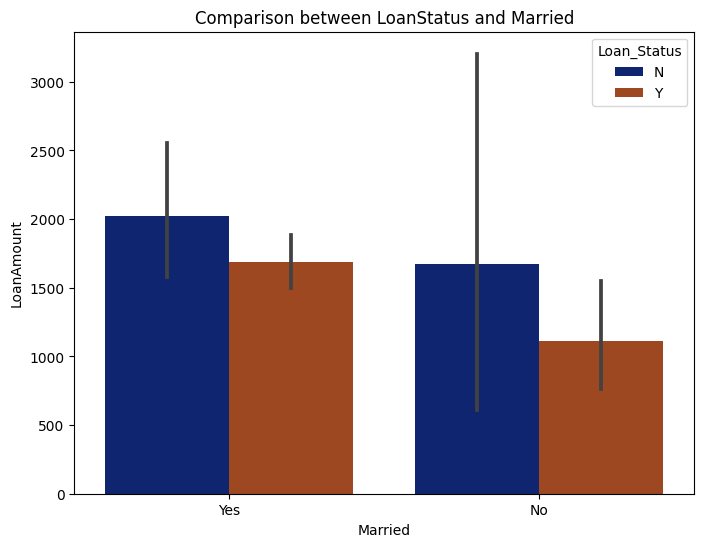

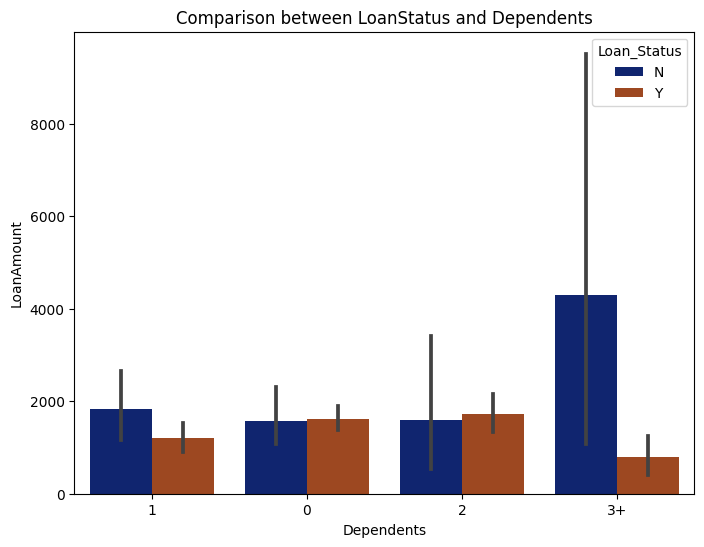

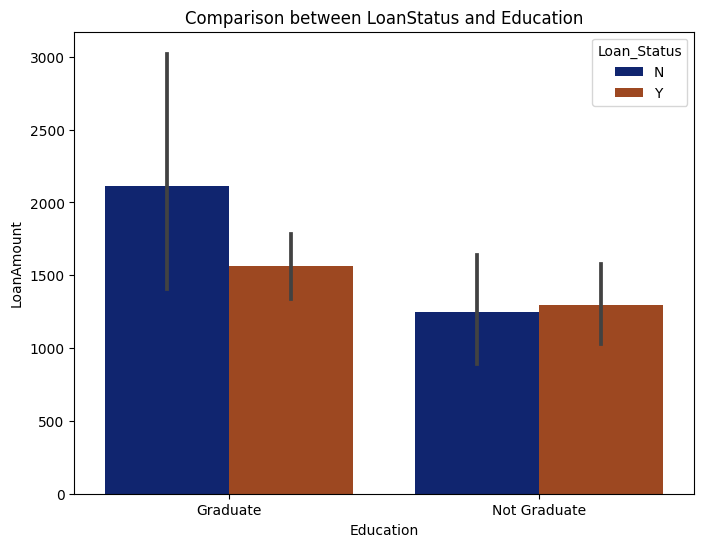

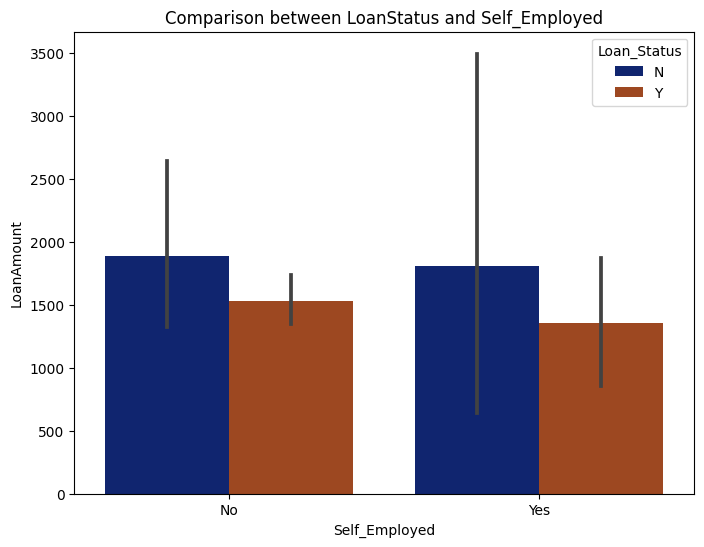

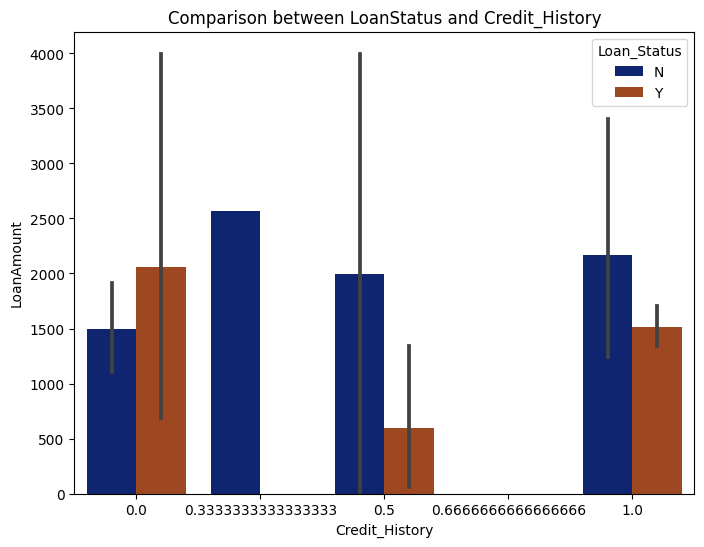

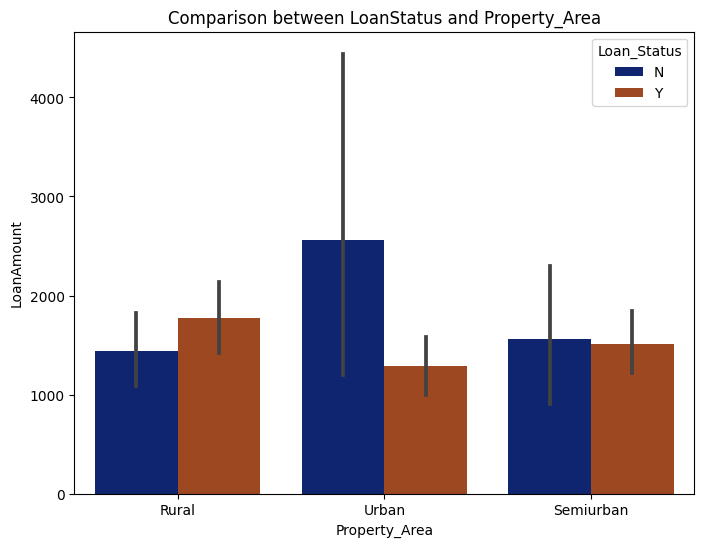

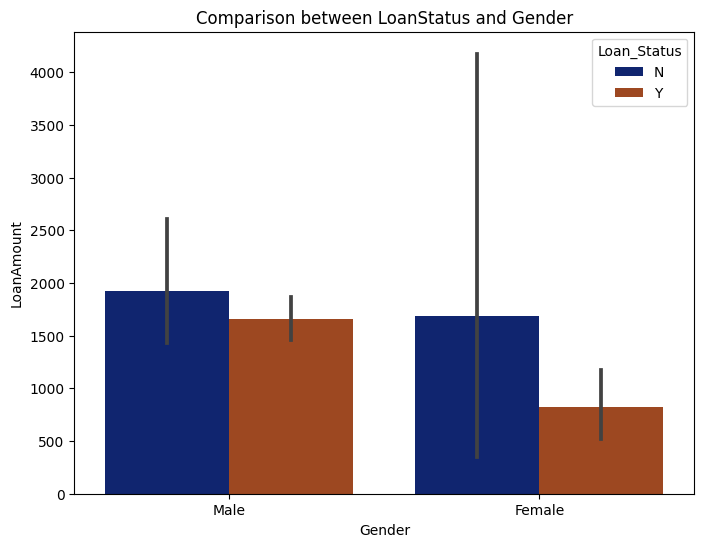

In [35]:
plt.figure(figsize=(15, 6))

for column in ['Married', 'Dependents', 'Education', 'Self_Employed', 'Credit_History', 'Property_Area','Gender']:
    plt.figure(figsize=(8, 6))
    sns.barplot(x=column, y='CoapplicantIncome', data=df, hue='Loan_Status', palette='dark', dodge=True)
    plt.title(f'Comparison between LoanStatus and {column}')
    plt.xlabel(column)
    plt.ylabel('LoanAmount')
    plt.show()

Bar plots comparing CoapplicantIncome across various features by Loan_Status:

- Gender: Males show higher coapplicant income for approved loans but lower for not approved loans. Suggests that having a male coapplicant positively contributes to loan approval.
- Marital Status: Married applicants exhibit significantly higher coapplicant incomes than unmarried ones. This is likely due to including the spouse's income as coapplicant income.
- Dependents: Coapplicant income increases from 0 to 2 dependents but drops with 3 or more children. The initial rise might be due to the need for two incomes to support children.
- Education: Graduates have higher coapplicant incomes than non-graduates for approved loans. Education level does not substantially impact coapplicant income for not approved loans.
- Self-Employed: Self-employed individuals have lower coapplicant incomes than non-self-employed for approved loans. For not approved loans, incomes are comparable across groups.
- Credit History: Coapplicant incomes are very similar for good (1) and bad (0) credit history. Credit history doesn't appear correlated with coapplicant income.
- Property Area: For approved loans, semiurban residents have higher coapplicant incomes. For not approved loans, rural residents have the lowest coapplicant incomes.
In summary, higher coapplicant incomes are associated with being male, married, educated, and living in semiurban areas for approved loans. Dependents and self-employment also influence these differences. Credit history does not have a significant correlation with coapplicant income.

<Figure size 1500x600 with 0 Axes>

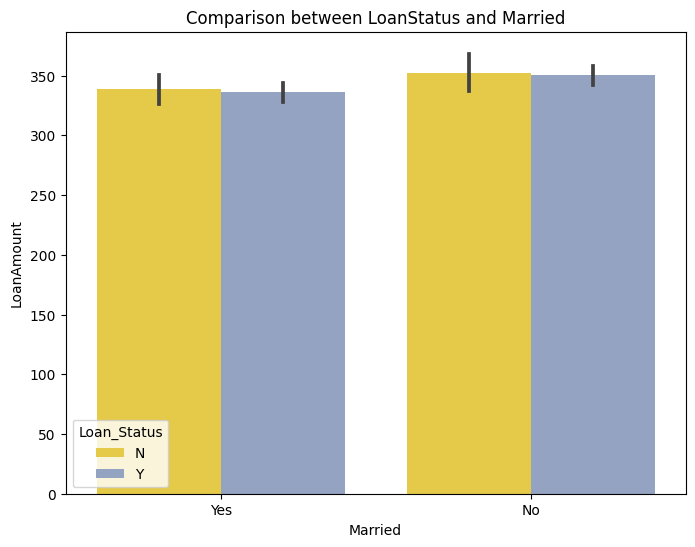

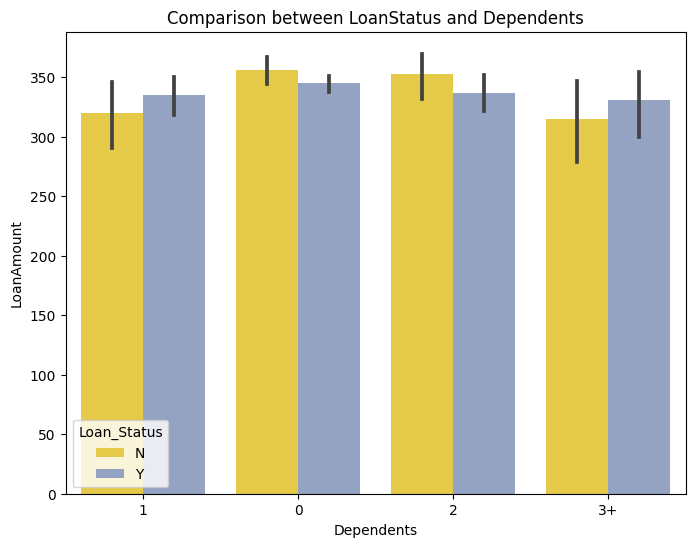

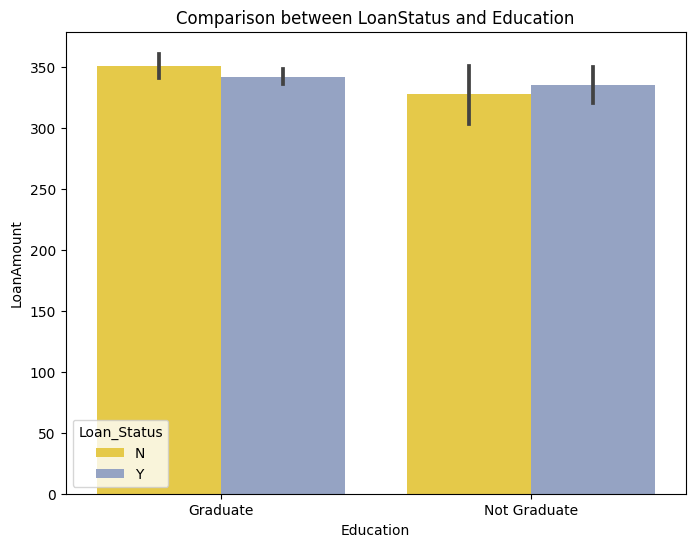

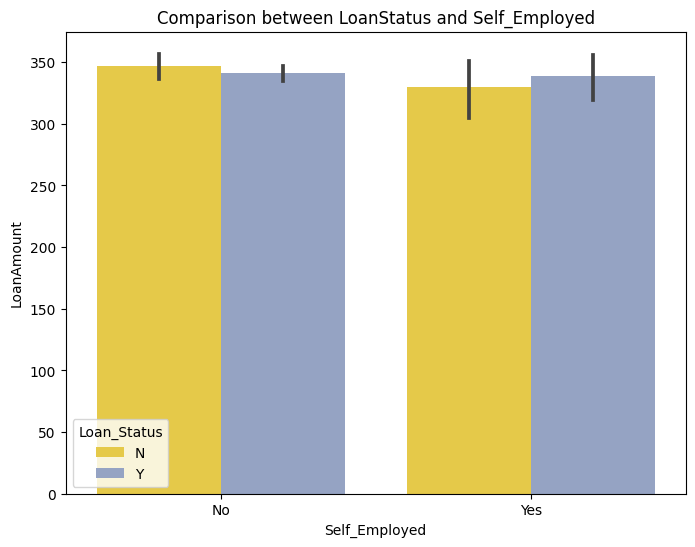

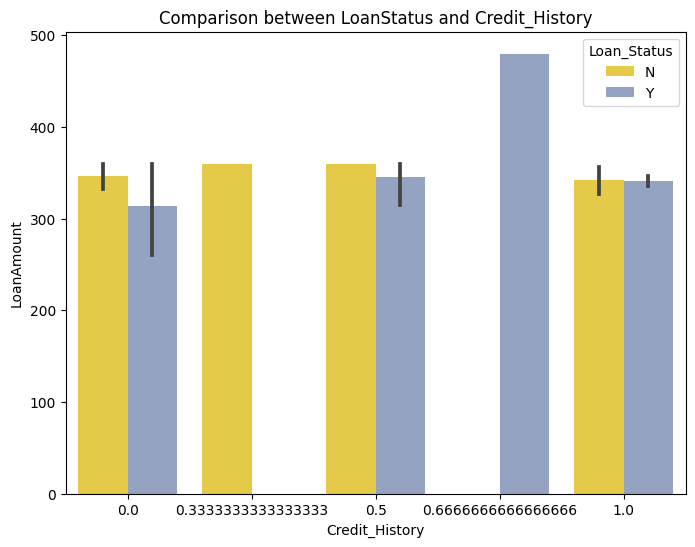

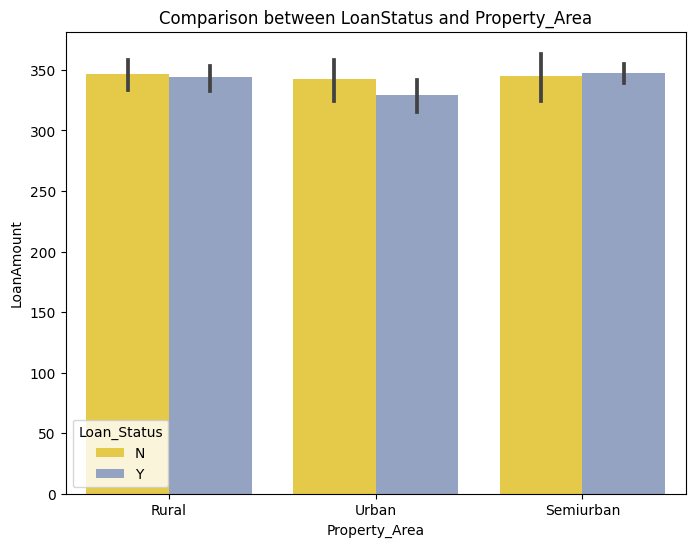

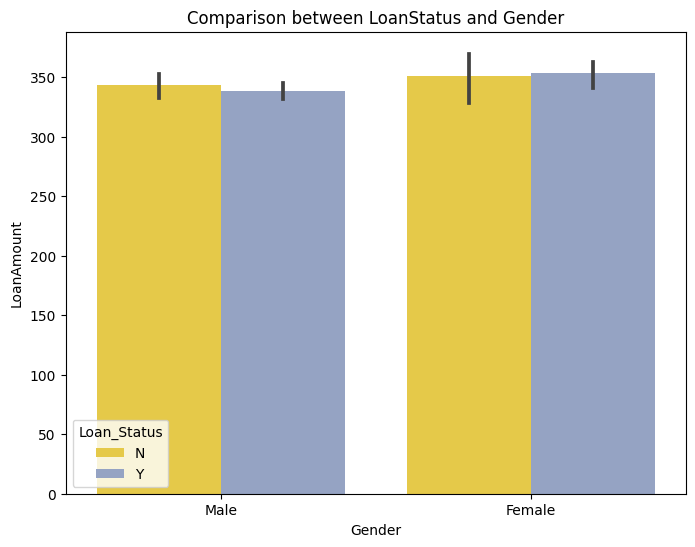

In [36]:
plt.figure(figsize=(15, 6))

for column in ['Married', 'Dependents', 'Education', 'Self_Employed', 'Credit_History', 'Property_Area','Gender']:
    plt.figure(figsize=(8, 6))
    sns.barplot(x=column, y='Loan_Amount_Term', data=df, hue='Loan_Status', palette='Set2_r', dodge=True)
    plt.title(f'Comparison between LoanStatus and {column}')
    plt.xlabel(column)
    plt.ylabel('LoanAmount')
    plt.show()

Bar plots comparing Loan_Amount_Term across different features and Loan_Status:

- Gender: Loan amount term is similar for males and females, regardless of loan approval status. Gender does not appear to impact the loan amount term significantly.
- Marital Status: For approved loans, married applicants tend to have longer loan terms than unmarried ones. However, for not approved loans, the terms are comparable.
- Dependents: The loan amount term increases with the number of dependents for approved loans. This could be attributed to the need for longer-term loans to accommodate more dependents.
- Education: Graduates have longer loan terms for approved loans compared to non-graduates. Terms are similar between education levels for not approved loans.
- Self-Employed: Self-employed individuals have slightly longer terms for approved loans, with similar terms for not approved loans. Being self-employed contributes somewhat positively to obtaining a longer repayment term.
- Credit History: Loan amount terms are similar across credit history categories for both approved and not approved loans. Credit history does not strongly correlate with the repayment term.
- Property Area: For approved loans, semiurban residents tend to have longer loan terms. For not approved loans, terms are comparable across regions.
In summary, longer loan terms are associated with being married, having more dependents, being a graduate, and living in semiurban areas for approved loans. Credit history and gender do not have a substantial impact on the loan term.

### Checking for skewness

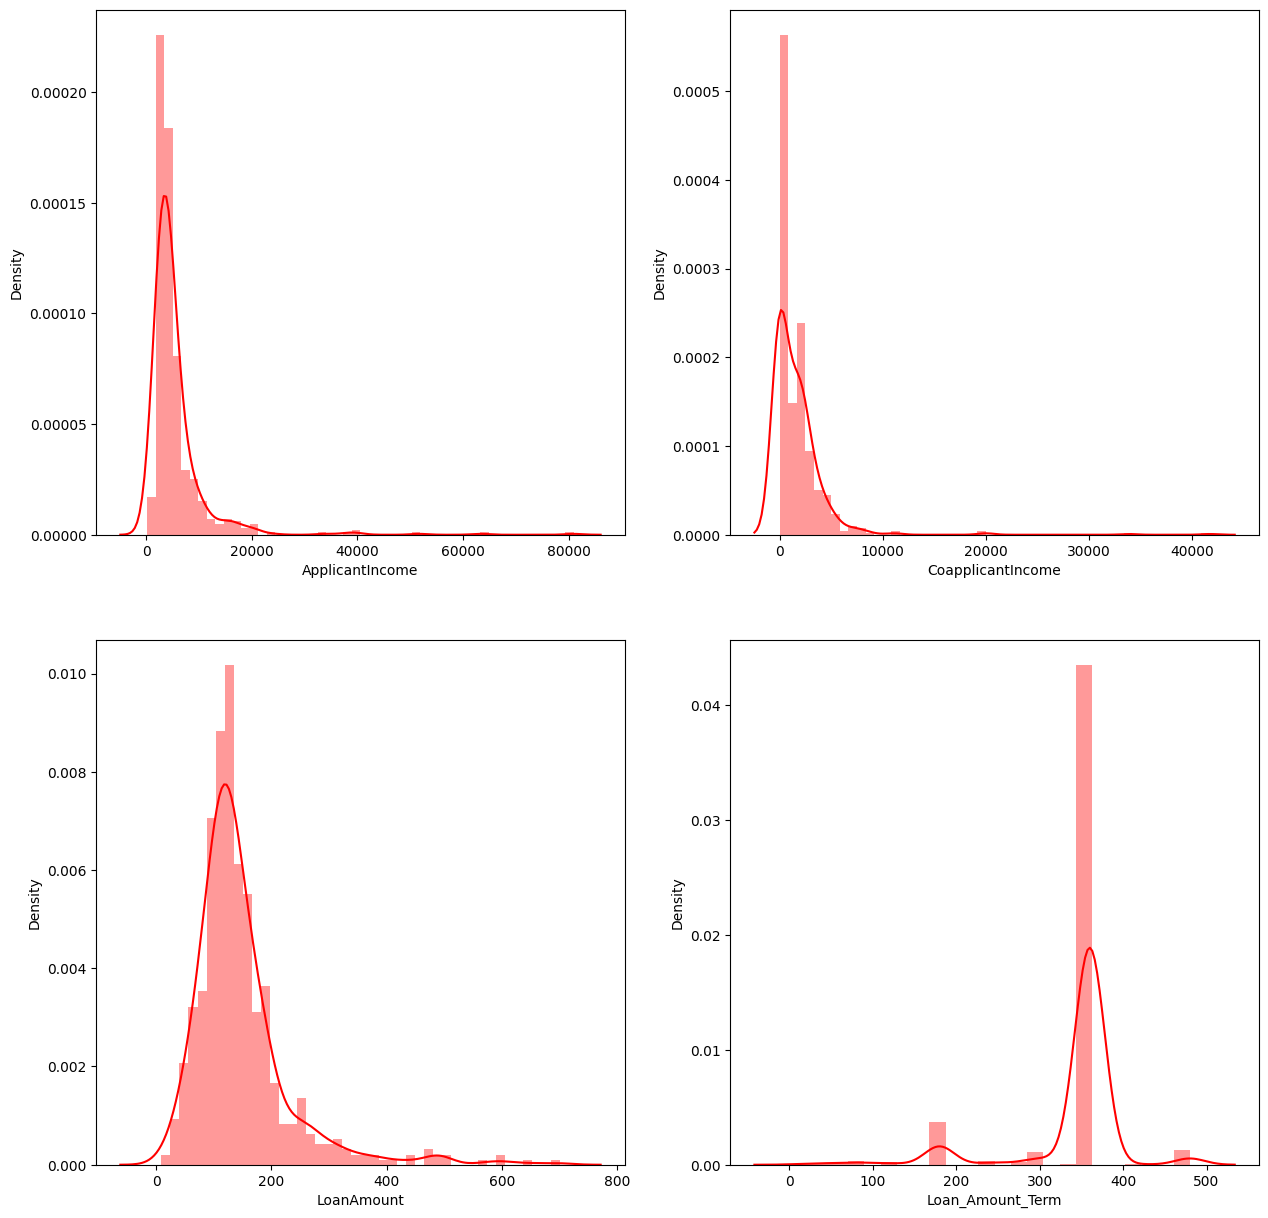

In [37]:
numerical_col = ['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']
plt.figure(figsize=(15,15),facecolor='white')
plotnumber=1

for col in numerical_col:
    if plotnumber <=4:
        ax=plt.subplot(2,2,plotnumber)
        sns.distplot(df[col],color = 'r')
        plt.xlabel(col, fontsize=10)
        plt.yticks(rotation = 0, fontsize = 10)
    plotnumber+=1
plt.show()

The histograms depict the distributions of ApplicantIncome, CoapplicantIncome, LoanAmount, and Loan_Amount_Term.
- ApplicantIncome: Exhibits a right-skewed distribution, with the majority having incomes between $2000 to $8000. A long right tail indicates some applicants with very high incomes. Suggests that most applicants have modest incomes, with a smaller number having exceptionally high incomes.
- CoapplicantIncome: Displays a strong peak at 0. Indicating many applicants do not have a coapplicant. The rest of the distribution is right-skewed, similar to applicant income. Most coapplicants earn between $0-$5000, with high incomes being rare.
- LoanAmount: Demonstrates a unimodal distribution centered around $100,000 to $150,000 values. Indicates that most approved loans fall within this range. Right-skewed with a tail, suggesting a few very high-value loans are approved.
- Loan_Amount_Term: Presents a strong bimodal distribution, with peaks at 360 months (30 years) and 180 months (15 years). Indicates that borrowers typically prefer 30 or 15-year repayment terms. Less common to see other terms, with the distribution centered around these two options.

In summary, applicant characteristics like income exhibit right-skewed distributions, while loan amount centers on mid-range figures. Loan terms peak strongly at 15/30 years, providing a data-driven perspective on the preferred incomes, loan sizes, and repayment periods among borrowers.

### Checking for outliers

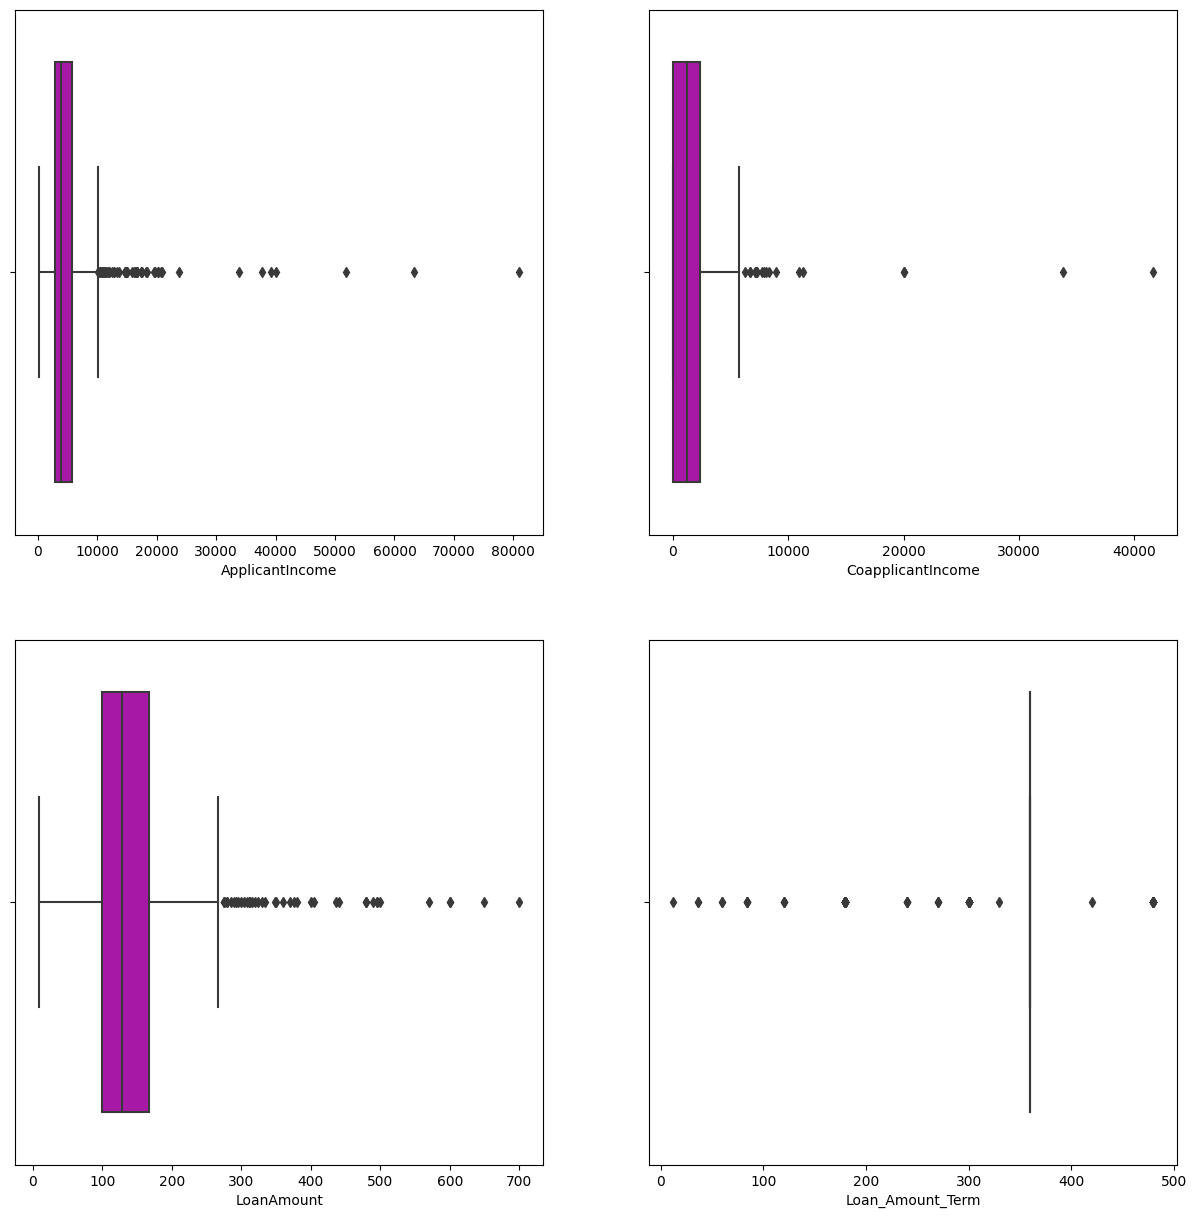

In [38]:
numerical_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']

plt.figure(figsize=(15, 15), facecolor='white')
plotnumber = 1

for col in numerical_cols:
    if plotnumber <= 4:
        plt.subplot(2, 2, plotnumber)
        sns.boxplot(x=df[col], color='m')  # Use x argument to specify the DataFrame column
        plt.xlabel(col, fontsize=10)
        plt.yticks(rotation=0, fontsize=10)
    plotnumber += 1

plt.show()


Analysis of the boxplots representing the distribution of numerical features:

- ApplicantIncome: Median income is approximately 3500, with lower and upper quartiles around $2500 and $6200. Outliers on the higher end indicate high-earning applicants. Positive skewness suggests the majority earn less than 6000 per month.
- CoapplicantIncome: Median coapplicant income is 0, as shown by the central green line. Lower quartile is also 0, indicating at least 25% have no coapplicant income. Upper quartile is around 2000 per month. High-income outliers exist, but most coapplicants earn modest incomes.
- LoanAmount: Median loan amount is around 110,000. Lower quartile is near 75,000, and the upper quartile is around 185,000. Outliers on the higher end indicate some large approved loan amounts. Most approved loans seem to be under 200,000.
- Loan_Amount_Term: Median is 360 months or 30 years, with lower and upper quartiles also at 360 months. Little variation or outliers compared to other features. Confirms that the vast majority of loans are given for terms of 30 years.
In summary, applicant incomes and loan amounts exhibit positive skewness with upper outliers. Many coapplicants contribute no income, and 30-year loan terms are overwhelmingly preferred with little variation.

In [39]:
df.drop(columns=['Loan_ID'],axis=1,inplace=True)

- The Loan_ID column has been dropped from the dataset, that might not contribute to the analysis. 

### Encoding

In [40]:
from sklearn.preprocessing import LabelEncoder

def encode_categorical_columns(df, columns):
    """
    Encode categorical columns in a DataFrame using LabelEncoder.

    Parameters:
    - df: DataFrame
    - columns: list of column names to be encoded

    Returns:
    - DataFrame: DataFrame with encoded columns
    - dict: Mapping of label encoders for each column
    """

    label_encoders = {}

    for column in columns:
        le = LabelEncoder()
        df[column] = le.fit_transform(df[column])
        label_encoders[column] = le

    return df, label_encoders

# Assuming df is your DataFrame, and you want to encode 'type' and 'region'
encoded_df, encoders = encode_categorical_columns(df, ['Gender','Married','Dependents','Education',
                                                       'Self_Employed','Credit_History','Property_Area',
                                                       'Loan_Status'])
encoders

{'Gender': LabelEncoder(),
 'Married': LabelEncoder(),
 'Dependents': LabelEncoder(),
 'Education': LabelEncoder(),
 'Self_Employed': LabelEncoder(),
 'Credit_History': LabelEncoder(),
 'Property_Area': LabelEncoder(),
 'Loan_Status': LabelEncoder()}

In [41]:
df = encoded_df

- Created new dataset df

In [42]:
df.head(3)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,1,1,1,0,0,4583,1508.0,128.0,360.0,4,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,4,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,4,2,1


In [43]:
df.shape

(613, 12)

In [44]:
df.skew()

Gender              -1.646215
Married             -0.649810
Dependents           1.013119
Education            1.365098
Self_Employed        2.157034
ApplicantIncome      6.534654
CoapplicantIncome    7.488653
LoanAmount           2.649696
Loan_Amount_Term    -2.356959
Credit_History      -1.842999
Property_Area       -0.063379
Loan_Status         -0.807437
dtype: float64

- Gender: Moderately negatively skewed, indicating a slight bias towards more females in the dataset.
- Married: Negatively skewed, suggesting a higher proportion of unmarried individuals.
- Dependents: Positively skewed, indicating a concentration in lower values with some higher values.
- Education: Positively skewed, with a bias towards higher education levels.
- Self_Employed: Highly positively skewed, indicating a significant concentration in non-self-employed individuals.
- ApplicantIncome: Highly positively skewed, signifying a concentration of lower incomes with some very high earners.
- CoapplicantIncome: Highly positively skewed, with a concentration of lower incomes and few high earners.
- LoanAmount: Moderately positively skewed, suggesting a concentration in lower loan amounts with some higher values.
- Loan_Amount_Term: Moderately negatively skewed, indicating a concentration in longer loan terms.
- Credit_History: Moderately negatively skewed, suggesting a bias towards a positive credit history.
- Property_Area: Slightly negatively skewed, indicating a slight preference for urban or rural areas over semiurban.
- Loan_Status: Negatively skewed, suggesting more approvals than denials.

In [45]:
from scipy.stats import boxcox
from scipy.stats import skew

numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
skewness_before = df[numerical_cols].apply(lambda x: skew(x))


for col in numerical_cols:
    if skewness_before[col] > 0.5:  
        if df[col].min() > 0:
            df[col], _ = boxcox(df[col] + 1)  
        else:
            df[col] = boxcox(df[col] - df[col].min() + 1)[0] 


skewness_after = df[numerical_cols].apply(lambda x: skew(x))

skewness_summary = pd.DataFrame({'Skewness Before': skewness_before, 'Skewness After': skewness_after})
print("Skewness Summary:")
print(skewness_summary)


Skewness Summary:
                   Skewness Before  Skewness After
ApplicantIncome           6.518653       -0.093195
CoapplicantIncome         7.470316       -0.148140
LoanAmount                2.643207        0.017777
Loan_Amount_Term         -2.351187       -2.351187
Credit_History           -1.838486       -1.838486


- CoxBox transformation has been effective in reducing the skewness of ApplicantIncome, CoapplicantIncome, and LoanAmount, bringing them closer to a normal distribution. 

### Rechecking for normal distribution

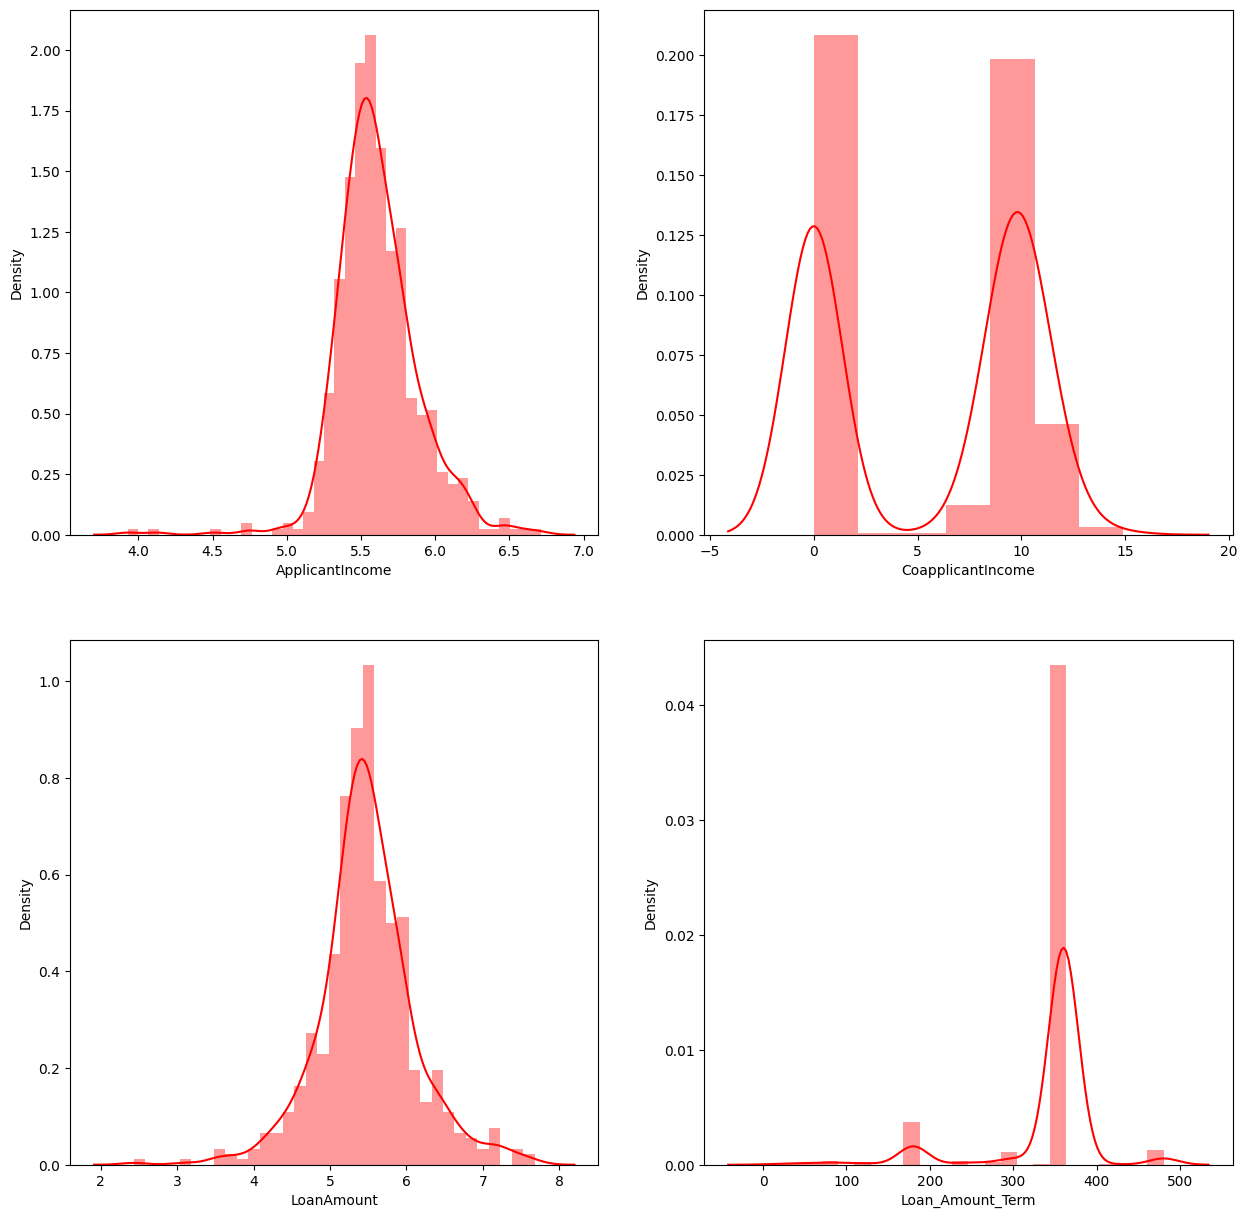

In [46]:
numerical_col = ['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']
plt.figure(figsize=(15,15),facecolor='white')
plotnumber=1

for col in numerical_col:
    if plotnumber <=4:
        ax=plt.subplot(2,2,plotnumber)
        sns.distplot(df[col],color = 'r')
        plt.xlabel(col, fontsize=10)
        plt.yticks(rotation = 0, fontsize = 10)
    plotnumber+=1
plt.show()

- the variables are close to normal distribution

### Removing outliers using zscore

In [47]:
from scipy.stats import zscore

numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

z_scores = np.abs(zscore(df[numerical_cols]))
threshold = 3

outlier_mask = (z_scores > threshold).any(axis=1)


df_no_outliers = df[~outlier_mask]

print(f"Shape before removing outliers: {df.shape}")
print(f"Shape after removing outliers: {df_no_outliers.shape}")


Shape before removing outliers: (613, 12)
Shape after removing outliers: (585, 12)


- The new shape have 585 rows and 12 columns

In [48]:
df = df_no_outliers

- The dataframe is df

###  Reassuring for outlier removal

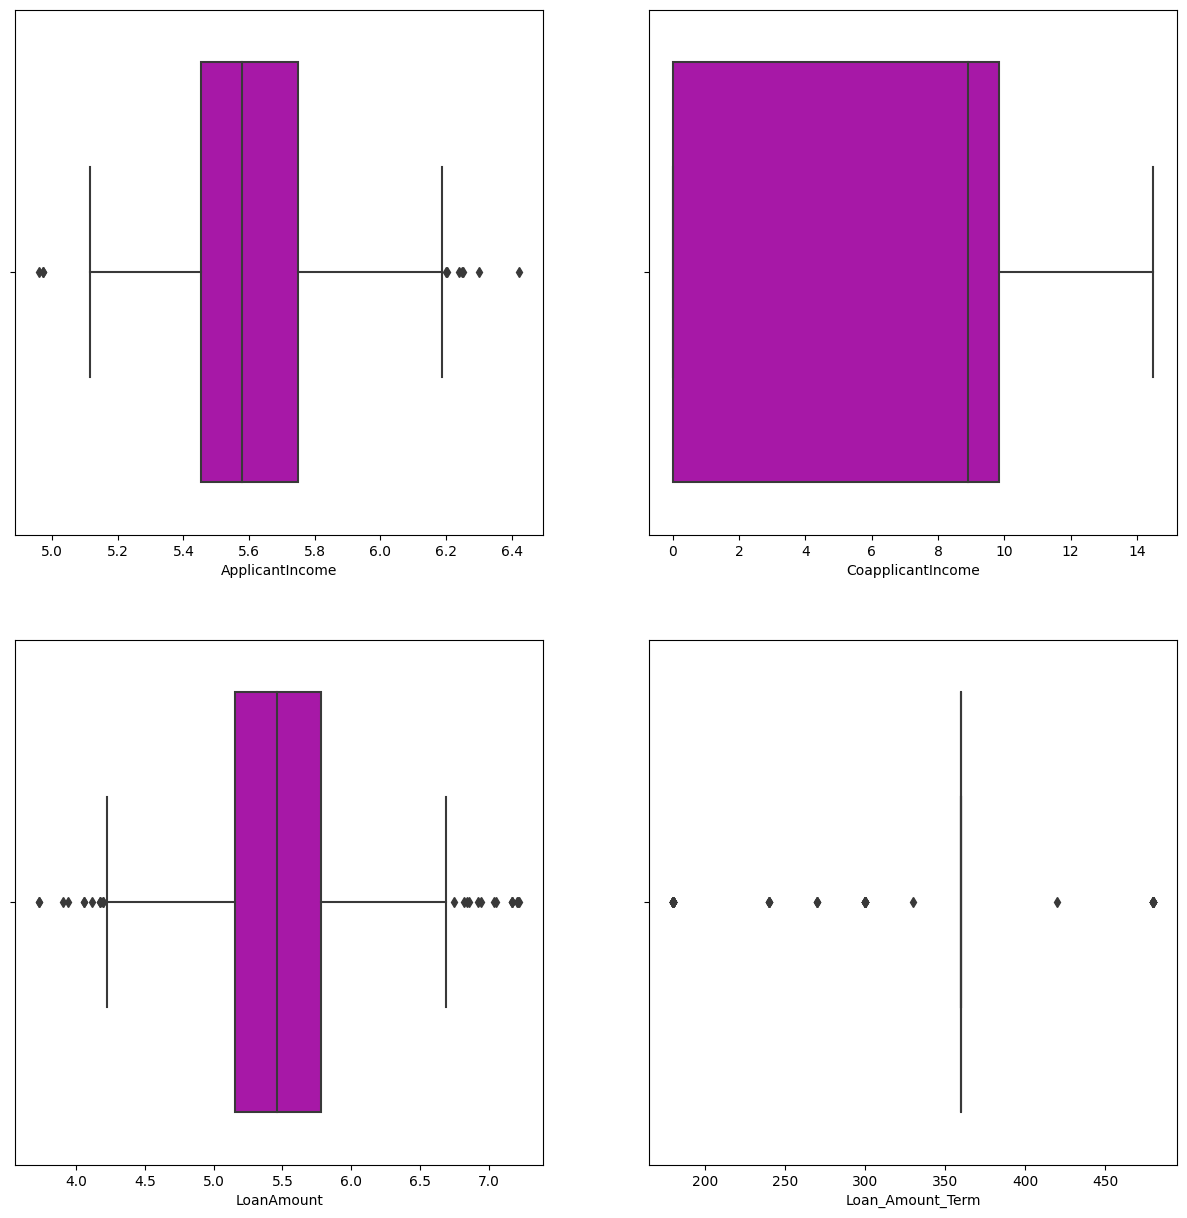

In [49]:
numerical_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']

plt.figure(figsize=(15, 15), facecolor='white')
plotnumber = 1

for col in numerical_cols:
    if plotnumber <= 4:
        plt.subplot(2, 2, plotnumber)
        sns.boxplot(x=df[col], color='m') 
        plt.xlabel(col, fontsize=10)
        plt.yticks(rotation=0, fontsize=10)
    plotnumber += 1

plt.show()

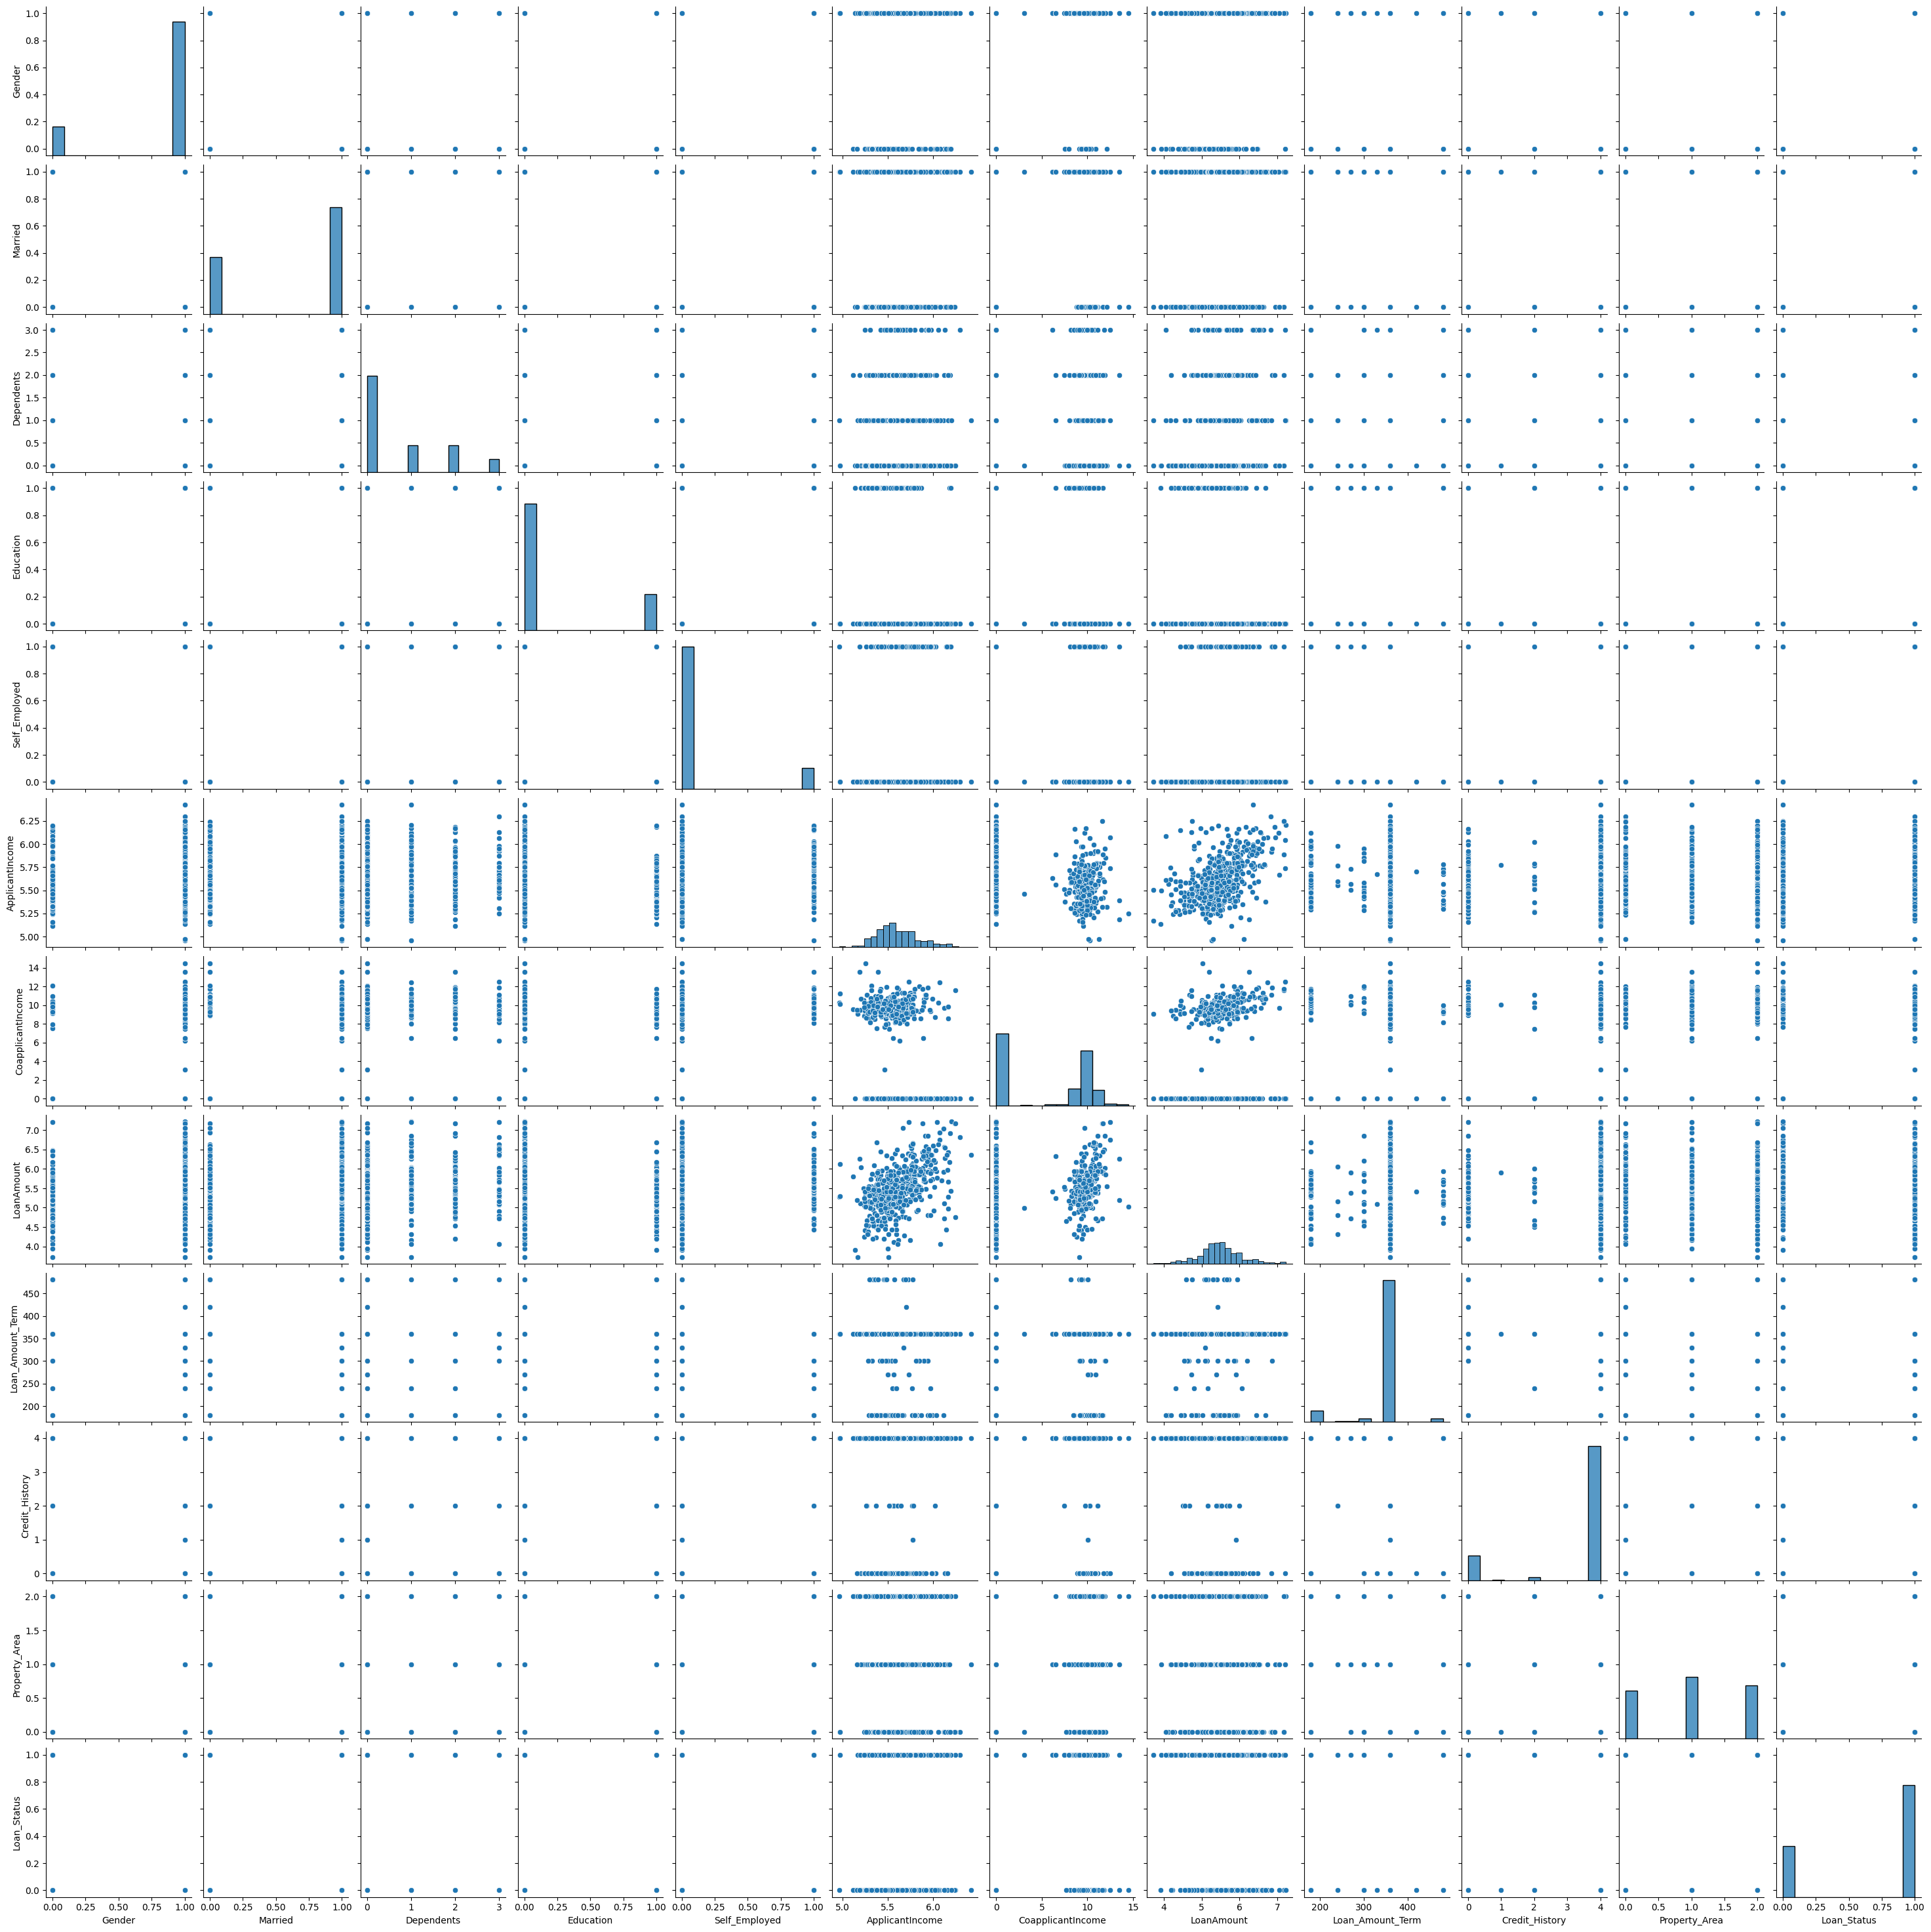

In [50]:
sns.pairplot(df)
plt.show()

In [51]:
df.describe()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,585.000000,585.000000,585.000000,585.000000,585.000000,585.000000,585.000000,585.000000,585.000000,585.000000,585.000000,585.000000
mean,0.820513,0.652991,0.731624,0.222222,0.128205,5.608385,5.497046,5.477747,347.589744,3.338462,1.032479,0.685470
std,0.384088,0.476426,1.000740,0.416095,0.334604,0.230573,4.948859,0.563468,51.602763,1.457729,0.787730,0.464726
min,0.000000,0.000000,0.000000,0.000000,0.000000,4.959537,0.000000,3.727622,180.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,5.454555,0.000000,5.155747,360.000000,4.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,0.000000,5.577867,8.902654,5.461683,360.000000,4.000000,1.000000,1.000000
75%,1.000000,1.000000,1.000000,0.000000,0.000000,5.748514,9.837842,5.780691,360.000000,4.000000,2.000000,1.000000
max,1.000000,1.000000,3.000000,1.000000,1.000000,6.422631,14.499508,7.223635,480.000000,4.000000,2.000000,1.000000


- The dataset summary indicates a majority of males (82%) and married individuals (65%). On average, there are fewer than one dependent. 
- Most are non-graduates, and a small percentage is self-employed (13%). Income-related features are log-transformed, with higher mean incomes. 
- The average loan term is around 29 years. The dataset leans towards positive credit history (mean=1.03) and a preference for semiurban areas (69%). Approximately 69% of loans are approved.

###  Correlation matrix

In [52]:
df.corr()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.370222,0.190760,0.046429,-0.007174,0.043573,0.240423,0.167728,-0.097027,0.013880,-0.025976,0.009347
Married,0.370222,1.000000,0.335872,0.018235,-0.010466,0.001814,0.319908,0.183101,-0.123230,0.009142,0.016394,0.086236
Dependents,0.190760,0.335872,1.000000,0.057114,0.062020,0.117953,0.005775,0.138403,-0.077538,-0.038572,-0.008473,0.009642
Education,0.046429,0.018235,0.057114,1.000000,-0.008199,-0.192067,0.046988,-0.137792,-0.096230,-0.095983,-0.069075,-0.089536
Self_Employed,-0.007174,-0.010466,0.062020,-0.008199,1.000000,0.202811,-0.081641,0.108011,-0.035625,-0.015393,-0.028818,-0.026541
ApplicantIncome,0.043573,0.001814,0.117953,-0.192067,0.202811,1.000000,-0.367915,0.487898,-0.040654,0.064305,-0.059260,-0.010463
CoapplicantIncome,0.240423,0.319908,0.005775,0.046988,-0.081641,-0.367915,1.000000,0.183892,-0.012790,-0.006725,-0.048849,0.064781
LoanAmount,0.167728,0.183101,0.138403,-0.137792,0.108011,0.487898,0.183892,1.000000,0.060899,0.017766,-0.093095,-0.045289
Loan_Amount_Term,-0.097027,-0.123230,-0.077538,-0.096230,-0.035625,-0.040654,-0.012790,0.060899,1.000000,0.019058,-0.045672,-0.032380
Credit_History,0.013880,0.009142,-0.038572,-0.095983,-0.015393,0.064305,-0.006725,0.017766,0.019058,1.000000,0.005322,0.549196


- Strong Positive Correlations: Credit_History has a significant positive correlation (0.55) with Loan_Status, indicating that a positive credit history increases the likelihood of loan approval.
- Moderate Positive Correlations: Married and CoapplicantIncome show moderate positive correlations (0.09 and 0.06, respectively), suggesting a slight positive influence on loan approval.
- Weak Positive Correlations: Gender, Dependents, and Education have weak positive correlations, implying minimal positive impact on loan approval.
- Weak Negative Correlations: Education has a weak negative correlation (-0.09), suggesting that being a graduate may have a slight negative impact on loan approval.
- Very Weak Correlations: ApplicantIncome, Self_Employed, Loan_Amount_Term, LoanAmount, Property_Area, and Dependents show very weak correlations (close to 0), suggesting minimal linear relationships with Loan_Status.

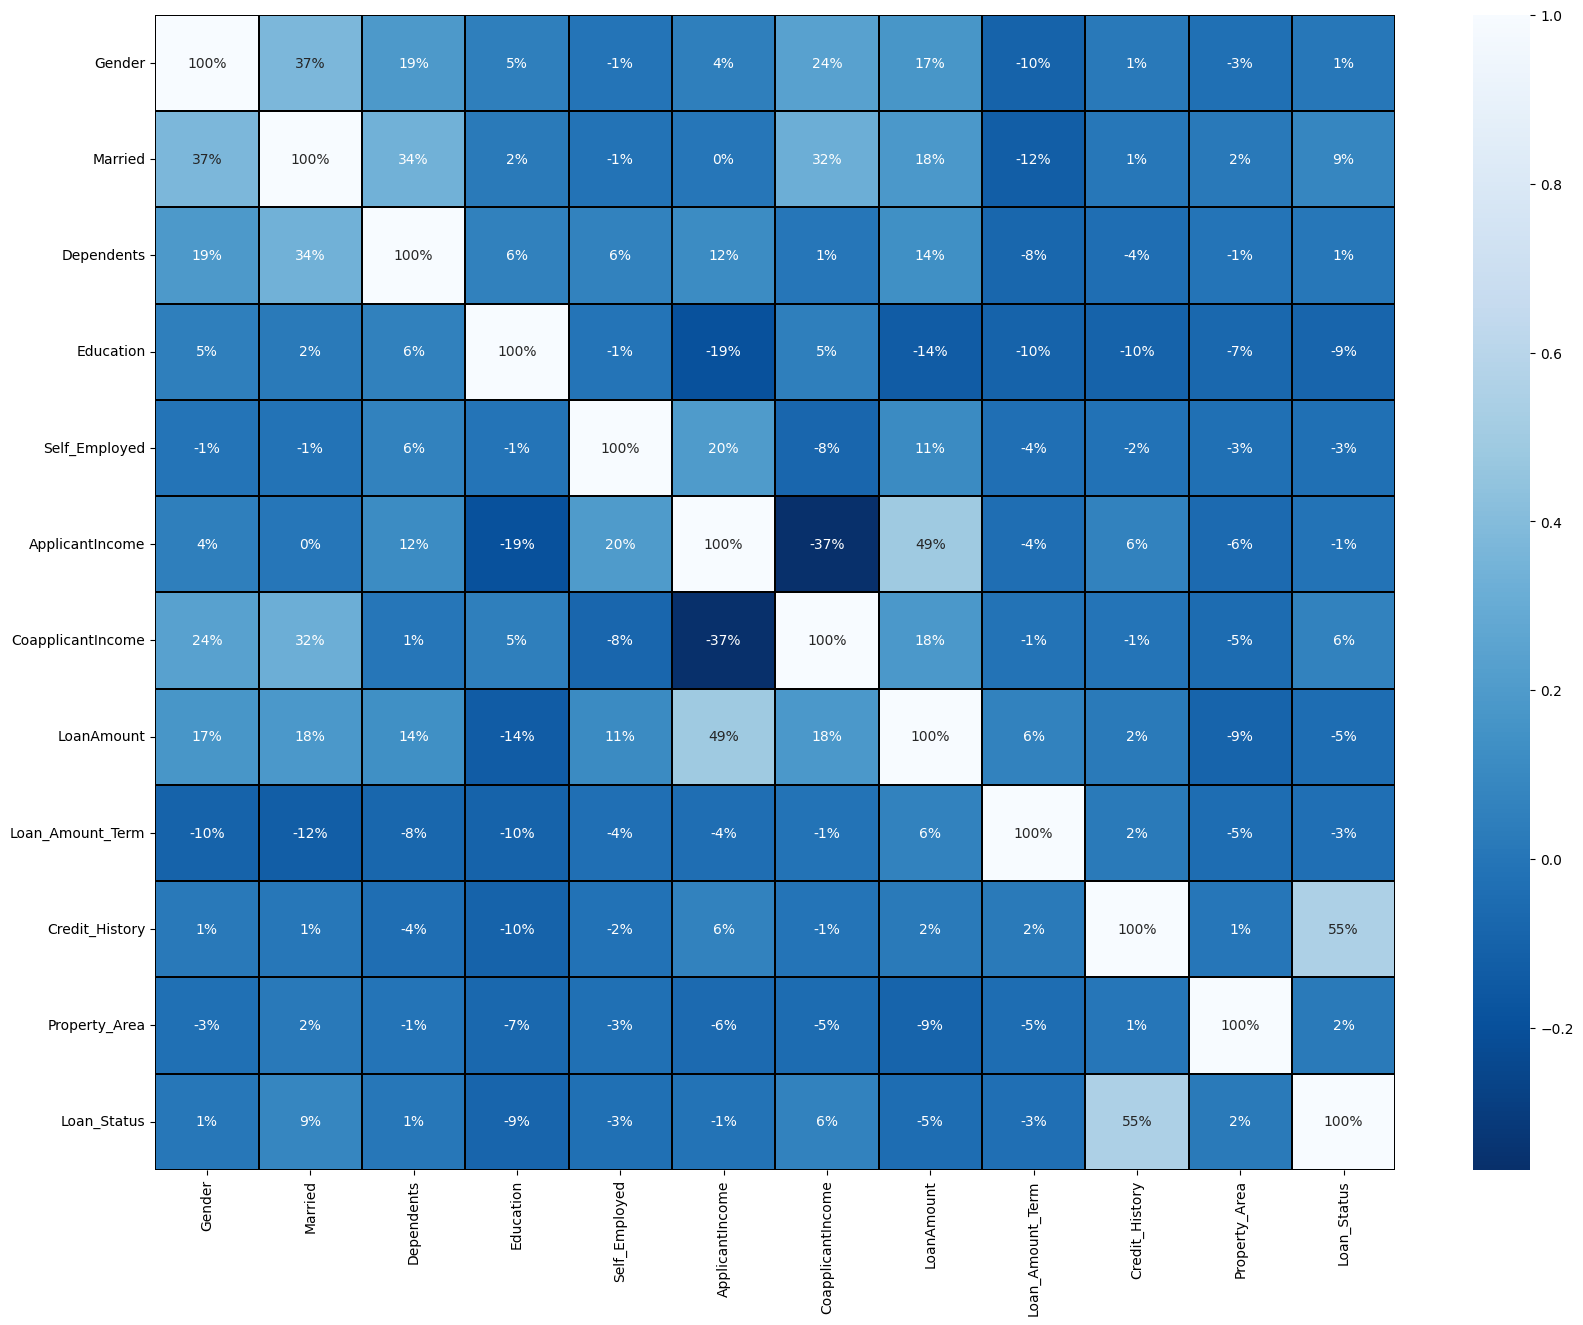

In [53]:
# Visualizing the correlation matrix by plotting heatmap
plt.figure(figsize = (20,15))
sns.heatmap(df.corr(), linewidths=0.1, fmt = '0.0%', linecolor ='black', annot = True, cmap = 'Blues_r')
plt.yticks(rotation=0)
plt.show()

- Credit_History, Married, and CoapplicantIncome have noticeable correlations with Loan_Status, indicating their potential influence on loan approval.

In [54]:
df.corr()['Loan_Status'].sort_values(ascending = False)

Loan_Status          1.000000
Credit_History       0.549196
Married              0.086236
CoapplicantIncome    0.064781
Property_Area        0.018598
Dependents           0.009642
Gender               0.009347
ApplicantIncome     -0.010463
Self_Employed       -0.026541
Loan_Amount_Term    -0.032380
LoanAmount          -0.045289
Education           -0.089536
Name: Loan_Status, dtype: float64

The correlation coefficients between Loan_Status and other features indicate the degree of linear relationship.

- Strong Positive Correlation: Credit_History has a significant positive correlation (0.55) with Loan_Status, suggesting that a positive credit history increases the likelihood of loan approval.

- Weak Positive Correlations: Married and CoapplicantIncome have weak positive correlations (0.09 and 0.06, respectively), indicating a slight positive influence on loan approval.

- Weak Negative Correlations: Education has a weak negative correlation (-0.09), suggesting that being a graduate may have a slight negative impact on loan approval.

- Very Weak Correlations: ApplicantIncome, Self_Employed, Loan_Amount_Term, LoanAmount, Gender, Dependents, and Property_Area show very weak correlations (close to 0), suggesting minimal linear relationships with Loan_Status.

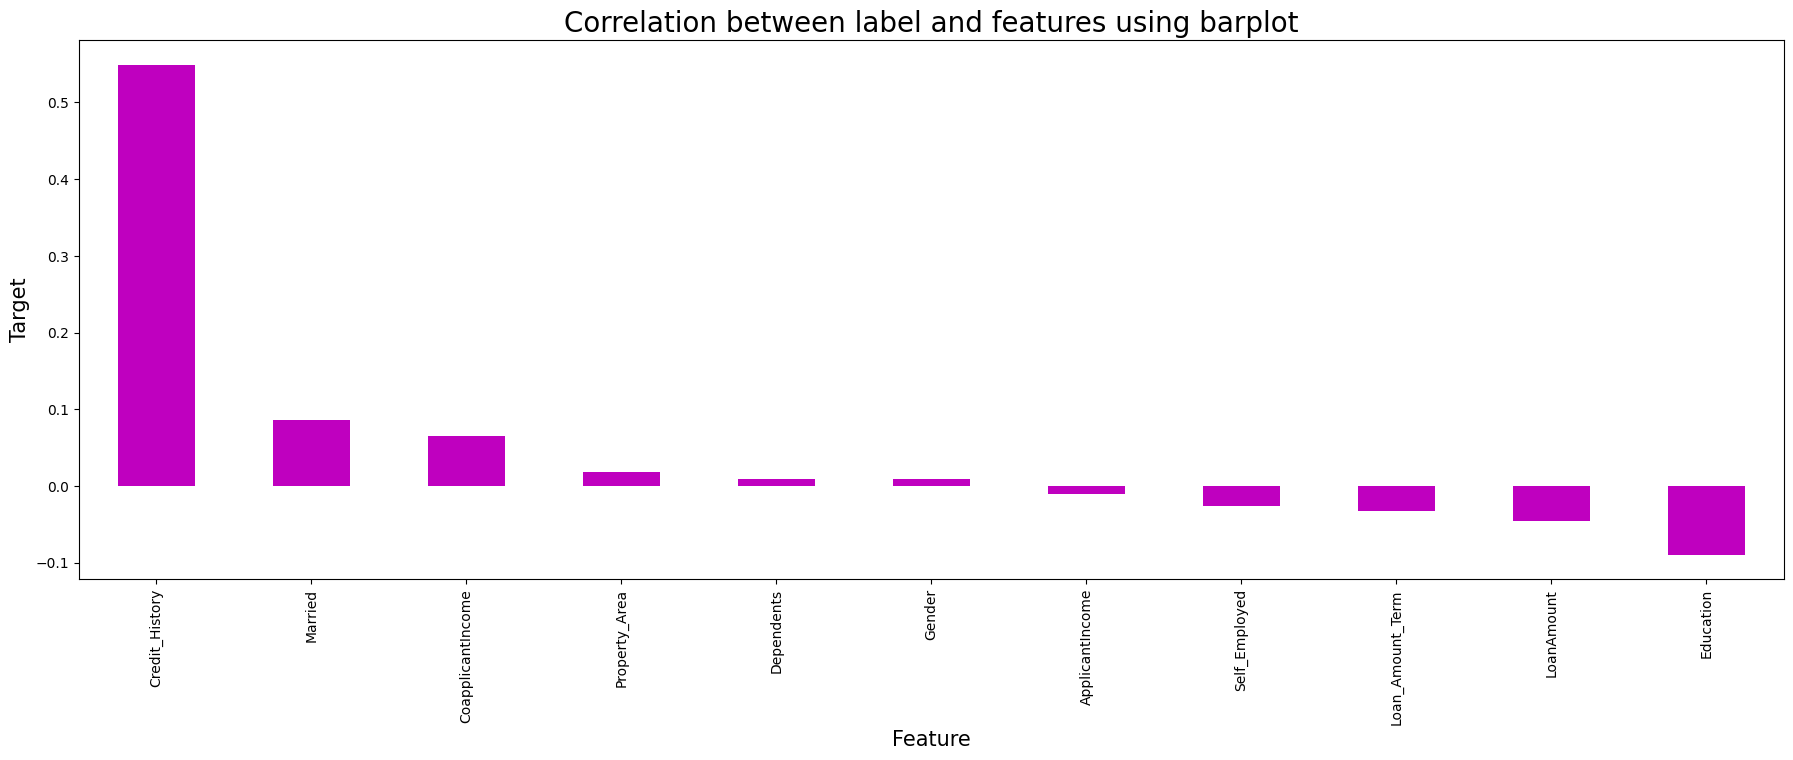

In [55]:
plt.figure(figsize = (22,7))
df.corr()['Loan_Status'].sort_values(ascending = False).drop(['Loan_Status']).plot(kind='bar',color='m')
plt.xlabel('Feature', fontsize = 15)
plt.ylabel('Target',fontsize = 15)
plt.title('Correlation between label and features using barplot', fontsize = 20)
plt.show()

- Credit_History appears to be the most influential factor, with a positive credit history strongly associated with loan approval. Other factors show weak to very weak correlations, suggesting that they might have limited linear impact on loan approval in this dataset.

### Separating independent variables from target variable

In [56]:
x=df.drop("Loan_Status",axis=1)
y=df['Loan_Status']

### Standardization

In [57]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0.467707,0.728981,0.268407,-0.534522,-0.383482,0.209270,0.747275,-0.028533,0.240702,0.454203,-1.311823
1,0.467707,0.728981,-0.731708,-0.534522,2.607681,-0.586565,-1.111721,-1.469479,0.240702,0.454203,1.229291
2,0.467707,0.728981,-0.731708,1.870829,-0.383482,-0.875931,0.889418,-0.171321,0.240702,0.454203,1.229291
3,0.467707,-1.371777,-0.731708,-0.534522,-0.383482,0.697706,-1.111721,0.186417,0.240702,0.454203,1.229291
4,0.467707,0.728981,1.268522,-0.534522,2.607681,0.513959,1.078431,1.633141,0.240702,0.454203,1.229291
...,...,...,...,...,...,...,...,...,...,...,...
580,-2.138090,-1.371777,-0.731708,-0.534522,-0.383482,-0.651728,-1.111721,-1.313340,0.240702,0.454203,-1.311823
581,0.467707,0.728981,2.268638,-0.534522,-0.383482,0.006137,-1.111721,-2.520889,-3.250469,0.454203,-1.311823
582,0.467707,0.728981,0.268407,-0.534522,-0.383482,1.220261,0.202056,1.509252,0.240702,0.454203,1.229291
583,0.467707,0.728981,1.268522,-0.534522,-0.383482,1.111484,-1.111721,0.820243,0.240702,0.454203,1.229291


In [58]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['vif values'] =[variance_inflation_factor(x.values,i) for i in range (len(x.columns))]
vif['Features'] =x.columns

vif

,vif values,Features
0,1.213649,Gender
1,1.397377,Married
2,1.174945,Dependents
3,1.078078,Education
4,1.048322,Self_Employed
5,1.960020,ApplicantIncome
6,1.634988,CoapplicantIncome
7,1.692936,LoanAmount
8,1.052381,Loan_Amount_Term
9,1.015821,Credit_History


- The VIF (Variance Inflation Factor) values for all the features are relatively low, mostly around 1, indicating a low degree of multicollinearity among them. 

In [59]:
y.value_counts()

Loan_Status
1    401
0    184
Name: count, dtype: int64

- The dataset consists of 401 instances with an approved loan status (1) and 184 instances with a not approved loan status (0).

### Balancing the Dataset Through Oversampling

In [60]:
# Oversampling the data
import imblearn
from imblearn.over_sampling import SMOTE  
sm = SMOTE()
x,y = sm.fit_resample(x,y)

- Applying SMOTE for Oversampling the Data to Address Imbalance

In [61]:
y.value_counts()

Loan_Status
0    401
1    401
Name: count, dtype: int64

- The dataset comprises an equal count of 401 instances for both approved and not approved loan statuses.

In [62]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [63]:
maxAccu = 0
maxRs = 0                       
for i in range(1,200):
    x_train, x_test,y_train,y_test = train_test_split(x,y,test_size =0.20, random_state=i)
    rf = RandomForestClassifier()
    rf.fit(x_train,y_train)
    pred = rf.predict(x_test)
    acc = accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu = acc
        maxRS = i
print('Best accuracy is ', maxAccu, 'at random_state', maxRS)

Best accuracy is  0.8944099378881988 at random_state 115


In [64]:
x_train, x_test,y_train,y_test = train_test_split(x,y,test_size =0.30, random_state=maxRS)

In [65]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier,BaggingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score
from sklearn.model_selection import cross_val_score

### RandomForestClassifier

In [66]:
RFC = RandomForestClassifier()                    
RFC.fit(x_train,y_train)
predRFC = RFC.predict(x_test)
print(accuracy_score(y_test,predRFC))
print(confusion_matrix(y_test,predRFC))
print(classification_report(y_test,predRFC))

0.8672199170124482
[[ 94  25]
 [  7 115]]
              precision    recall  f1-score   support

           0       0.93      0.79      0.85       119
           1       0.82      0.94      0.88       122

    accuracy                           0.87       241
   macro avg       0.88      0.87      0.87       241
weighted avg       0.88      0.87      0.87       241



### LogisticRegression

In [67]:
LR = LogisticRegression()
LR.fit(x_train,y_train)
predLR = LR.predict(x_test)
print(accuracy_score(y_test,predLR))
print(confusion_matrix(y_test,predLR))
print(classification_report(y_test,predLR))

0.7178423236514523
[[ 68  51]
 [ 17 105]]
              precision    recall  f1-score   support

           0       0.80      0.57      0.67       119
           1       0.67      0.86      0.76       122

    accuracy                           0.72       241
   macro avg       0.74      0.72      0.71       241
weighted avg       0.74      0.72      0.71       241



### KNeighborsClassifier

In [68]:
knn = KNeighborsClassifier()                    
knn.fit(x_train,y_train)
predknn = knn.predict(x_test)
print(accuracy_score(y_test,predknn))
print(confusion_matrix(y_test,predknn))
print(classification_report(y_test,predknn))

0.7468879668049793
[[83 36]
 [25 97]]
              precision    recall  f1-score   support

           0       0.77      0.70      0.73       119
           1       0.73      0.80      0.76       122

    accuracy                           0.75       241
   macro avg       0.75      0.75      0.75       241
weighted avg       0.75      0.75      0.75       241



### GradientBoostingClassifier

In [69]:
GB = GradientBoostingClassifier()
GB.fit(x_train,y_train)
predGB = GB.predict(x_test)
print(accuracy_score(y_test,predGB))
print(confusion_matrix(y_test,predGB))
print(classification_report(y_test,predGB))

0.8174273858921162
[[ 82  37]
 [  7 115]]
              precision    recall  f1-score   support

           0       0.92      0.69      0.79       119
           1       0.76      0.94      0.84       122

    accuracy                           0.82       241
   macro avg       0.84      0.82      0.81       241
weighted avg       0.84      0.82      0.81       241



### AdaBoostClassifier

In [70]:
ABC = AdaBoostClassifier()
ABC .fit(x_train,y_train)
predABC  = ABC .predict(x_test)
print(accuracy_score(y_test,predABC ))
print(confusion_matrix(y_test,predABC ))
print(classification_report(y_test,predABC ))

0.8049792531120332
[[ 88  31]
 [ 16 106]]
              precision    recall  f1-score   support

           0       0.85      0.74      0.79       119
           1       0.77      0.87      0.82       122

    accuracy                           0.80       241
   macro avg       0.81      0.80      0.80       241
weighted avg       0.81      0.80      0.80       241



###  BaggingClassifier

In [71]:
BC = BaggingClassifier()
BC.fit(x_train,y_train)
predBC = BC.predict(x_test)
print(accuracy_score(y_test,predBC))
print(confusion_matrix(y_test,predBC))
print(classification_report(y_test,predBC))

0.7966804979253111
[[94 25]
 [24 98]]
              precision    recall  f1-score   support

           0       0.80      0.79      0.79       119
           1       0.80      0.80      0.80       122

    accuracy                           0.80       241
   macro avg       0.80      0.80      0.80       241
weighted avg       0.80      0.80      0.80       241



### Support Vector Classifier

In [72]:
svc=SVC()
svc.fit(x_train,y_train)
predsvc = svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.7344398340248963
[[ 74  45]
 [ 19 103]]
              precision    recall  f1-score   support

           0       0.80      0.62      0.70       119
           1       0.70      0.84      0.76       122

    accuracy                           0.73       241
   macro avg       0.75      0.73      0.73       241
weighted avg       0.75      0.73      0.73       241



### ExtraTreesClassifier

In [73]:
ET = ExtraTreesClassifier()
ET.fit(x_train,y_train)
predET = ET.predict(x_test)
print(accuracy_score(y_test,predET))
print(confusion_matrix(y_test,predET))
print(classification_report(y_test,predET))

0.8423236514522822
[[ 95  24]
 [ 14 108]]
              precision    recall  f1-score   support

           0       0.87      0.80      0.83       119
           1       0.82      0.89      0.85       122

    accuracy                           0.84       241
   macro avg       0.84      0.84      0.84       241
weighted avg       0.84      0.84      0.84       241



### Cross Validation Score

In [74]:
from sklearn.model_selection import cross_val_score

### RandomForestClassifier

In [75]:
score1 = cross_val_score(RFC,x,y)
print(score1)
print('RFC score:',score1.mean())
print('Difference between Accuracy score and cross validation is: ',accuracy_score(y_test,predRFC)-score1.mean())

[0.77639752 0.77639752 0.89375    0.875      0.90625   ]
RFC score: 0.8455590062111801
Difference between Accuracy score and cross validation is:  0.021660910801268085


### LogisticRegression

In [76]:
score2 = cross_val_score(LR,x,y)
print(score2)
print('LR score:',score2.mean())
print('Difference between Accuracy score and cross validation is: ',accuracy_score(y_test,predLR)-score2.mean())

[0.67701863 0.72049689 0.775      0.75       0.6875    ]
LR score: 0.7220031055900621
Difference between Accuracy score and cross validation is:  -0.004160781938609803


### KNeighborsClassifier

In [77]:
score3 = cross_val_score(knn,x,y)
print(score3)
print('knn score:',score3.mean())
print('Difference between Accuracy score and cross validation is: ',accuracy_score(y_test,predknn)-score3.mean())

[0.70186335 0.69565217 0.74375    0.75       0.775     ]
knn score: 0.7332531055900621
Difference between Accuracy score and cross validation is:  0.013634861214917193


### GradientBoostClassifier

In [78]:
score4 = cross_val_score(GB,x,y)
print(score4)
print('GB score:',score4.mean())
print('Difference between Accuracy score and cross validation is: ',accuracy_score(y_test,predGB)-score4.mean())

[0.68322981 0.68944099 0.8375     0.83125    0.80625   ]
GB score: 0.7695341614906831
Difference between Accuracy score and cross validation is:  0.047893224401433065


### AdaBoostClassifier

In [79]:
score5 = cross_val_score(ABC,x,y)
print(score5)
print('ABC score:',score5.mean())
print('Difference between Accuracy score and cross validation is: ',accuracy_score(y_test,predABC)-score5.mean())

[0.68322981 0.70807453 0.80625    0.8125     0.73125   ]
ABC score: 0.7482608695652173
Difference between Accuracy score and cross validation is:  0.05671838354681591


### BaggingClassifier

In [80]:
score6 = cross_val_score(BC,x,y)
print(score6)
print('BC score:',score6.mean())
print('Difference between Accuracy score and cross validation is: ',accuracy_score(y_test,predBC)-score6.mean())

[0.72049689 0.74534161 0.81875    0.80625    0.83125   ]
BC score: 0.7844177018633541
Difference between Accuracy score and cross validation is:  0.012262796061957015


### Support Vector  Classifier

In [81]:
score7 = cross_val_score(svc,x,y)
print(score7)
print('svc score:',score7.mean())
print('Difference between Accuracy score and cross validation is: ',accuracy_score(y_test,predsvc)-score7.mean())

[0.72049689 0.73913043 0.7625     0.75       0.69375   ]
svc score: 0.7331754658385093
Difference between Accuracy score and cross validation is:  0.0012643681863869771


### ExtraTreesClassifier

In [82]:
score8 = cross_val_score(ET,x,y)
print(score8)
print('ET score:',score8.mean())
print('Difference between Accuracy score and cross validation is: ',accuracy_score(y_test,predET)-score8.mean())

[0.77018634 0.7826087  0.86875    0.8625     0.88125   ]
ET score: 0.8330590062111801
Difference between Accuracy score and cross validation is:  0.009264645241102043


### Compare accuracy of models

In [83]:
pd.DataFrame([['Support Vector Machine',score7.mean()*100],['Extra Trees Classifier',score8.mean()*100],['Gradient Boost Classifier',score4.mean()*100],
              ['LogisticRegression',score2.mean()*100],['Random Forest Classifier',score1.mean()*100],['KNeighborsClassifier',score3.mean()*100],['AdaBoostClassifier',score5.mean()*100],
              ['Bagging Classifier',score6.mean()*100]],columns=['Models','Accuracy'])

,Models,Accuracy
0,Support Vector Machine,73.317547
1,Extra Trees Classifier,83.305901
2,Gradient Boost Classifier,76.953416
3,LogisticRegression,72.200311
4,Random Forest Classifier,84.555901
5,KNeighborsClassifier,73.325311
6,AdaBoostClassifier,74.826087
7,Bagging Classifier,78.441770


**The model selected is ExtraTreesClassifier**
- Accuracy score : 84.23%
- cross_val_score: 83.30%
- Difference between Accuracy score and cross validation is: 0.009

### Hyperparameter Tuning

In [84]:
from sklearn.model_selection import GridSearchCV

In [85]:
# Extra Trees Classifier
params = {
    'n_estimators': [50, 100, 150, 200],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 3, 5, 7, 10],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 2, 5, 10],
    'max_features': ['auto', 'sqrt', 'log2', None],
    'random_state': [42]
}

In [86]:
GCV = GridSearchCV(ExtraTreesClassifier(),param_grid=params,cv=5)
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=ExtraTreesClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 3, 5, 7, 10],
                         'max_features': ['auto', 'sqrt', 'log2', None],
                         'min_samples_leaf': [1, 2, 5, 10],
                         'min_samples_split': [2, 5, 10, 15],
                         'n_estimators': [50, 100, 150, 200],
                         'random_state': [42]})

In [87]:
print('best params :', GCV.best_params_) 

best params : {'criterion': 'entropy', 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100, 'random_state': 42}


In [106]:
Final_model = ExtraTreesClassifier(n_estimators = 100,
                                   criterion= 'gini',
                                   max_depth = None,
                                   min_samples_split= 2,
                                   min_samples_leaf = 1,
                                   max_features= 'log2',
                                   random_state = 42)

In [107]:
Final_model.fit(x_train,y_train)
pred = Final_model.predict(x_test)
acc = accuracy_score(y_test,pred)
print(f"Accuracy: {acc * 100:.2f}%")

Accuracy: 84.23%


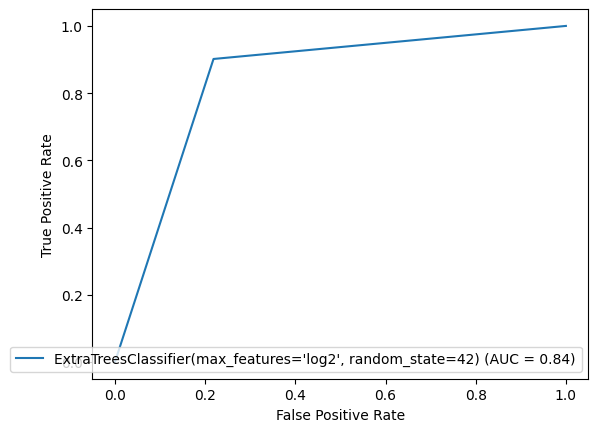

In [108]:
from sklearn import metrics
fpr,tpr,thresholds = metrics.roc_curve(y_test,pred)
roc_auc = metrics.auc(fpr,tpr)
display = metrics.RocCurveDisplay(fpr=fpr,tpr=tpr, roc_auc=roc_auc,estimator_name = Final_model)
display.plot()

- An AUC (Area Under the Curve) value of 0.84 indicates a relatively high level of accuracy in the model's ability to distinguish between positive and negative instances. 

In [109]:
import pickle
with open('Loan_Application_Status_Prediction.pkl', 'wb') as file:
    pickle.dump(Final_model, file)

In [110]:
with open('Loan_Application_Status_Prediction.pkl', 'rb') as file:
    model = pickle.load(file)
    result = model.score(x_test,y_test)
    print(result*100)


84.23236514522821


In [111]:
xtc=np.array(y_test)
df = pd.DataFrame()
df['Predicted'] =pred
df['Actual'] = xtc
df

,Predicted,Actual
0,0,0
1,1,1
2,1,1
3,1,1
4,1,0
...,...,...
236,0,0
237,0,0
238,1,1
239,1,1
